In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Atlas_creation/pooled_proteome_nsaf_1.csv")
data = data.pivot(index = "assay_id", columns = "uniprot_id", values = "NSAF")
metadata = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Atlas_creation/metadata_NSAF_atlas.csv")

In [4]:
nsaf = pd.merge(data, metadata[["assay_id", "tissue_type", "PXD_accession"]], on = "assay_id", right_index=True)
#Left out due to not being pooled, due to not all the pool files being available
nsaf = nsaf[nsaf.PXD_accession != "PXD009149"]
#Left out due to <10 protein ids
'''
assay_id    prot_ids
32491       7
32492       4
32493       6
'''
nsaf = nsaf[~nsaf.index.isin([32491, 32492, 32493])]

In [4]:
nsaf.to_csv("base_ML_dataset.csv", index = False)

In [4]:
nsaf["prot_ids"] = nsaf.iloc[:,nsaf.columns != "PXD_accession"].notna().sum(axis =1)

In [6]:
nsaf.iloc[:,nsaf.columns != "PXD_accession"].groupby(["tissue_type"]).prot_ids.describe()

count         mean          std     min      25%     50%  \
tissue_type                                                                
/                48.0  1328.666667   563.977981   436.0   969.50  1160.5   
T-cell            1.0  3015.000000          NaN  3015.0  3015.00  3015.0   
blood            74.0  2121.135135  1150.740956   951.0  1377.00  1492.5   
brain            63.0  3219.031746  1208.263269   318.0  3072.50  3348.0   
breast           83.0  2284.180723  1088.927187   800.0  1677.00  1944.0   
cervix           47.0  2304.404255  1417.076609   340.0  1605.50  1872.0   
colon            26.0  3841.576923  1075.838656  1489.0  3880.75  4054.0   
fetal kidney      4.0  1670.250000   430.840554  1189.0  1365.25  1728.5   
fibroblast        4.0  4298.000000  1839.482355  1723.0  3640.00  4797.5   
kidney           20.0  1608.400000  1313.708067   749.0   917.00  1029.0   
liver            11.0  7031.181818  1436.113702  4683.0  6240.50  7885.0   
lung              4.0  4349.250000  1107.510534  2689.0  4311.25  4881.0   
ovary            49.0  2838.795918   765.002314  1018.0  3028.00  3141.0   
prostate          4.0  4643.750000  1106.988219  2984.0  4617.50  5175.0   
skin             26.0  1470.115385   540.886482  1123.0  1247.50  1333.5   
trophoblast      18.0   574.111111   111.187647   418.0   448.00   601.0   
umbilical vein   28.0  1944.678571   779.059454   478.0  1700.00  1882.0   

                    75%     max  
tissue_type                      
/               1789.75  2292.0  
T-cell          3015.00  3015.0  
blood           2960.00  7152.0  
brain           3953.50  5245.0  
breast          2615.00  5820.0  
cervix          2670.00  7324.0  
colon           4552.25  5176.0  
fetal kidney    2033.50  2035.0  
fibroblast      5455.50  5874.0  
kidney          1780.50  6522.0  
liver           8034.00  8128.0  
lung            4919.00  4946.0  
ovary           3243.00  3423.0  
prostate        5201.25  5241.0  
skin            1427.75  3768.0  
trophoblast      658.00   708.0  
umbilical vein  2598.00  3465.0

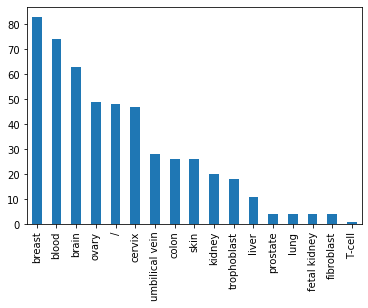

In [7]:
nsaf["tissue_type"].value_counts().plot(kind = "bar")

In [111]:
nsaf[nsaf.index == 31476 ].PXD_accession

assay_id
31476    PXD005045
Name: PXD_accession, dtype: object

In [5]:
labels = nsaf.pop("tissue_type")
data = nsaf.iloc[:, :-2]

In [12]:
data.shape

(510, 13166)

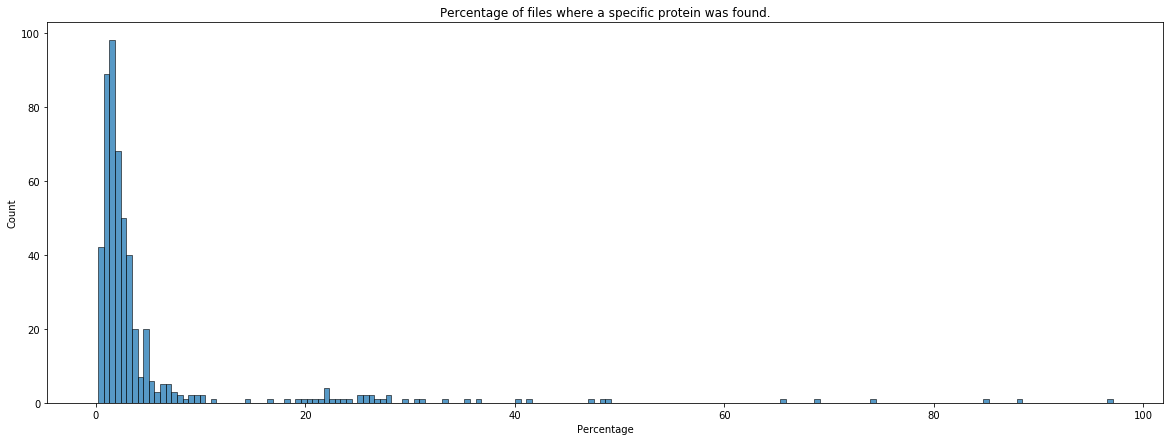

In [9]:
plt.figure(figsize = (20,7))
plt.title("Percentage of files where a specific protein was found.")
plt.xlabel("Percentage")
plt.ylabel(None)
sns.histplot(data.notna().sum().value_counts()/510*100)

#Most proteins are identified in only a small subset of the dataset

## Exploring comparability within and between datasets of different projects but same label

To illustrate homogenicity of the datasets, several metrics will be visualized:
- % similar identifications within projects
- % similar identifications between projects with the same label <br>
(The identifications within projects will be summed.)

In [6]:
meta = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Atlas_creation/metadata_NSAF_atlas.csv")

In [14]:
within_project_groups = meta.groupby(["PXD_accession", "cell_line"]).apply(lambda x: x["assay_id"].tolist())

### Within projects

project from 32342 contains 7 samples
project from 31104 contains 8 samples
project from 31736 contains 8 samples
project from 31290 contains 14 samples
project from 31316 contains 14 samples
project from 32488 contains 9 samples


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/upsetplot/plotting.py:960: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=self._default_figsize)


project from 32440 contains 48 samples
project from 32304 contains 11 samples
project from 31062 contains 42 samples
project from 31476 contains 9 samples
project from 31485 contains 9 samples
project from 32771 contains 17 samples
project from 32500 contains 12 samples
project from 31750 contains 24 samples
project from 31260 contains 12 samples
project from 31272 contains 12 samples
project from 31144 contains 24 samples
project from 31446 contains 26 samples
project from 31712 contains 24 samples
project from 31623 contains 18 samples
project from 31879 contains 18 samples


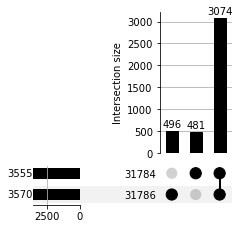

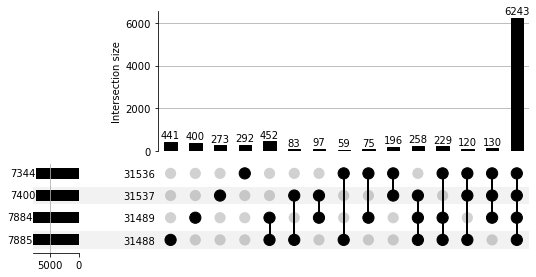

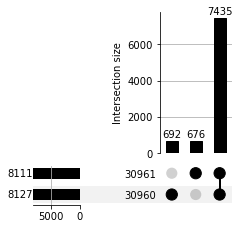

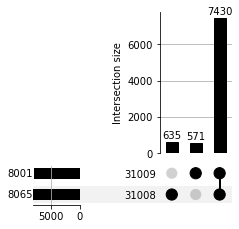

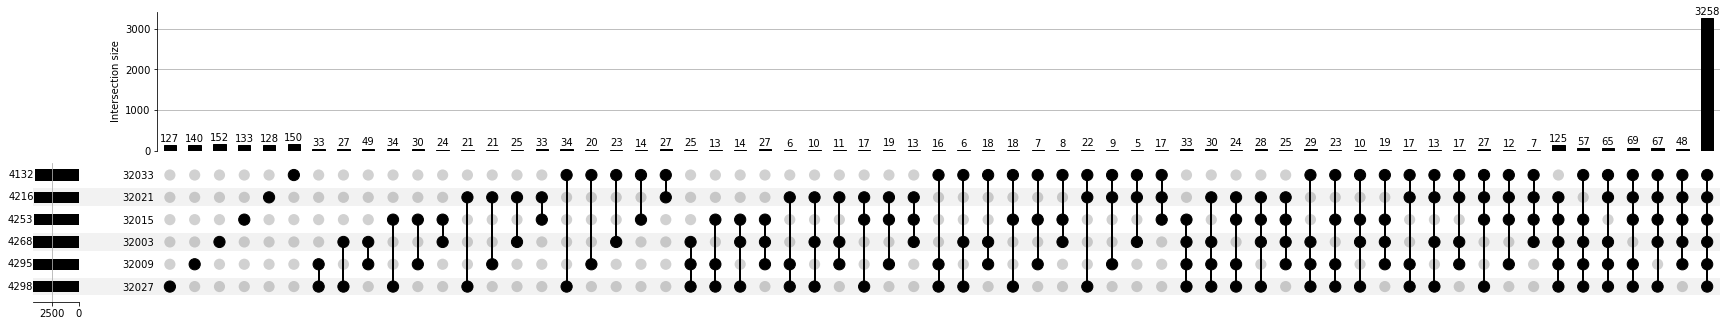

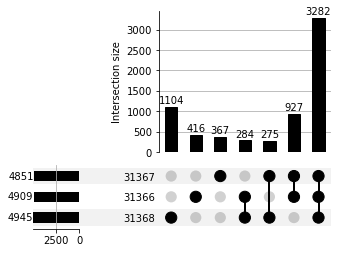

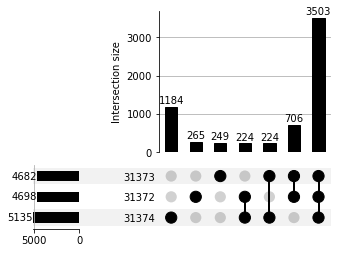

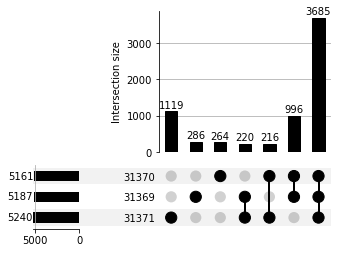

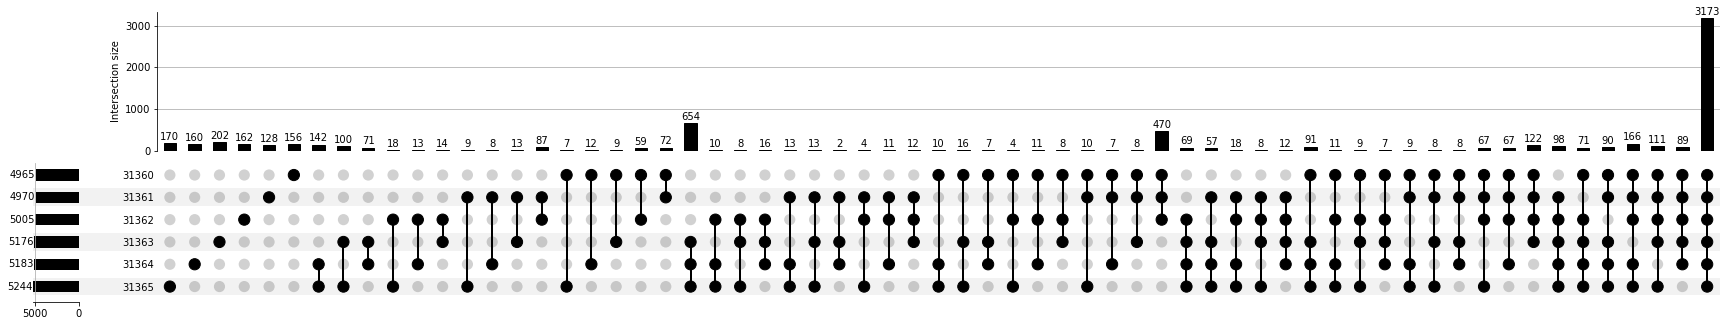

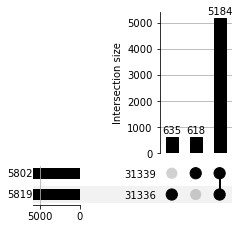

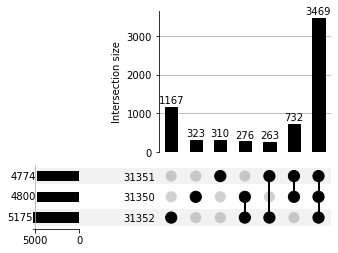

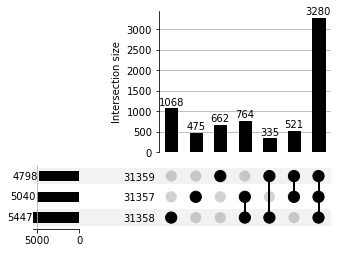

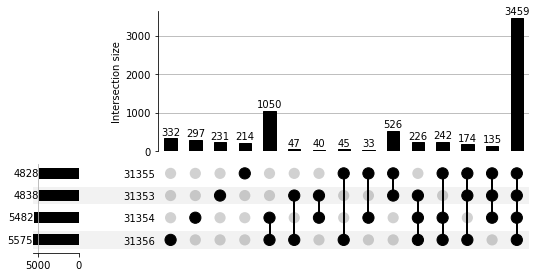

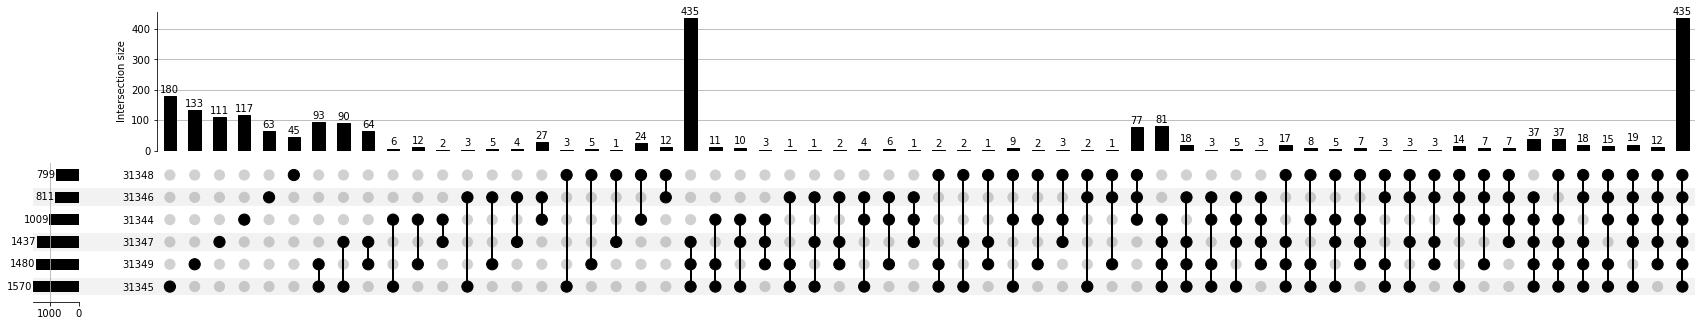

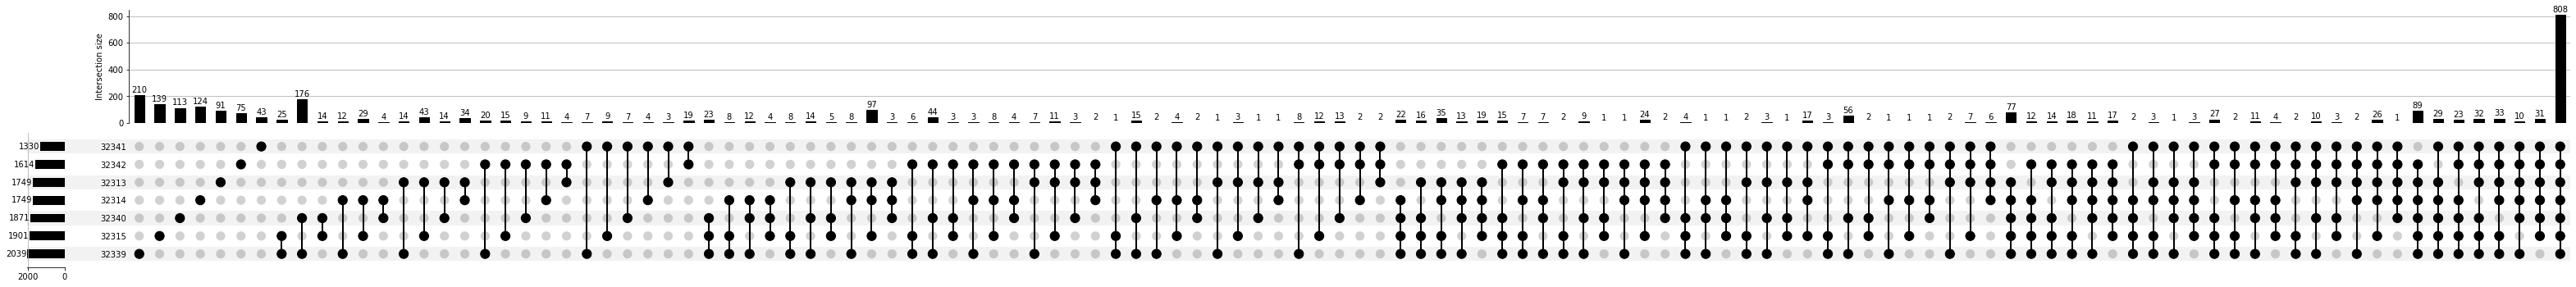

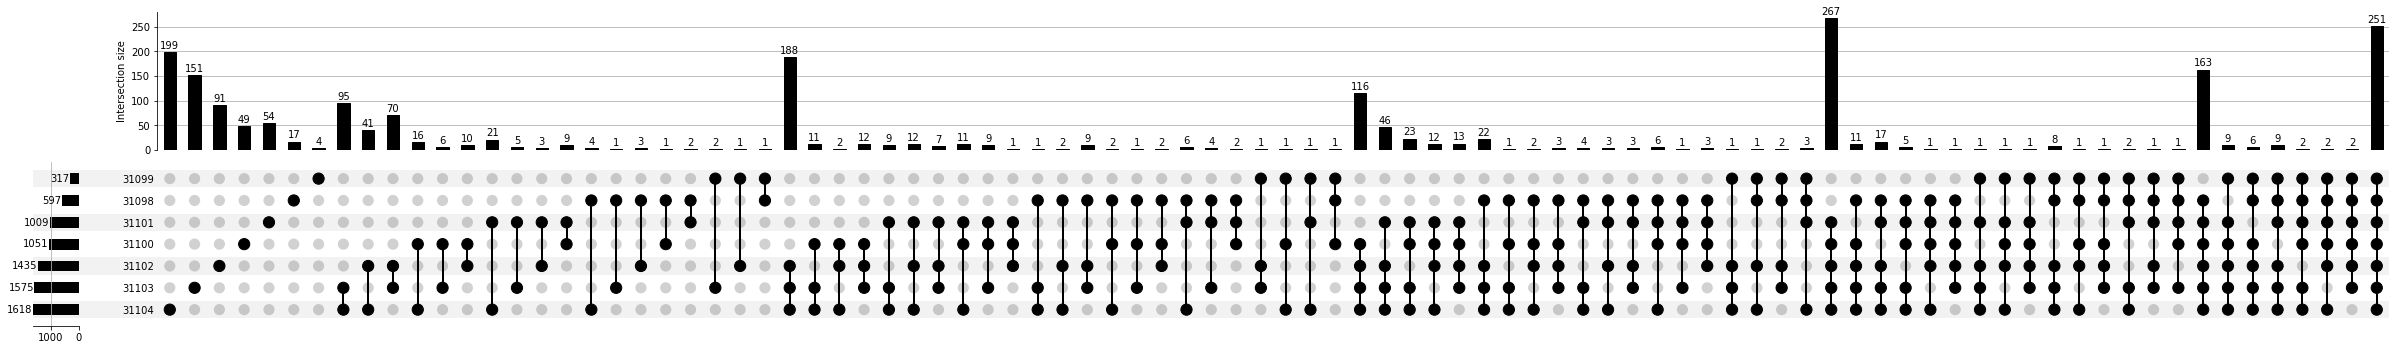

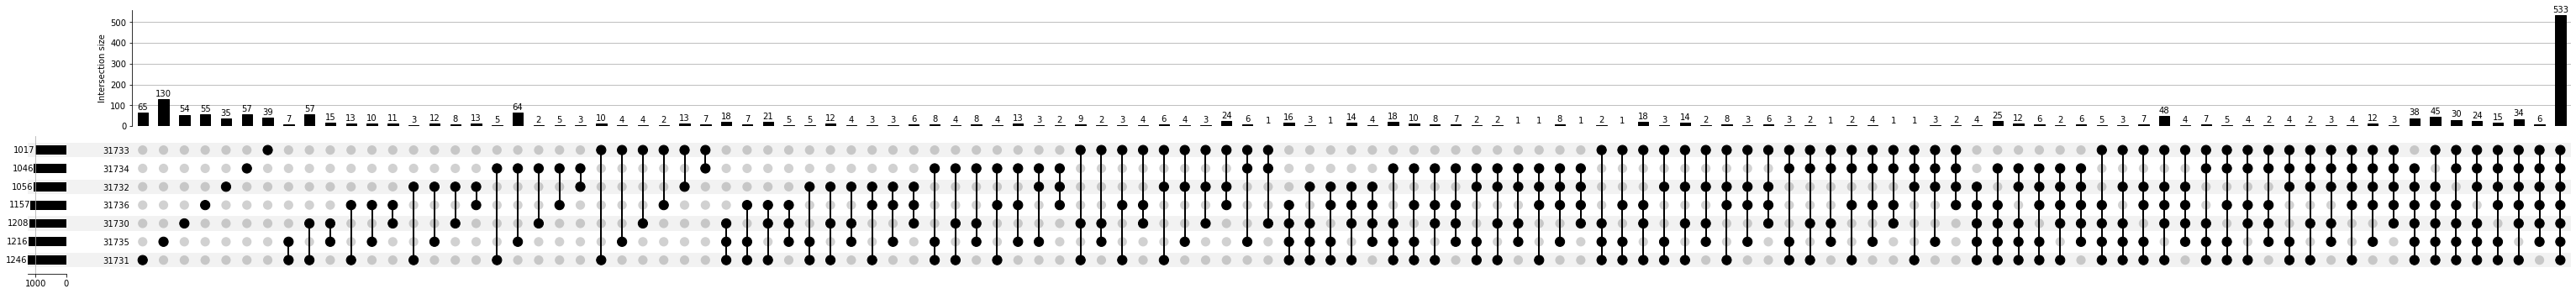

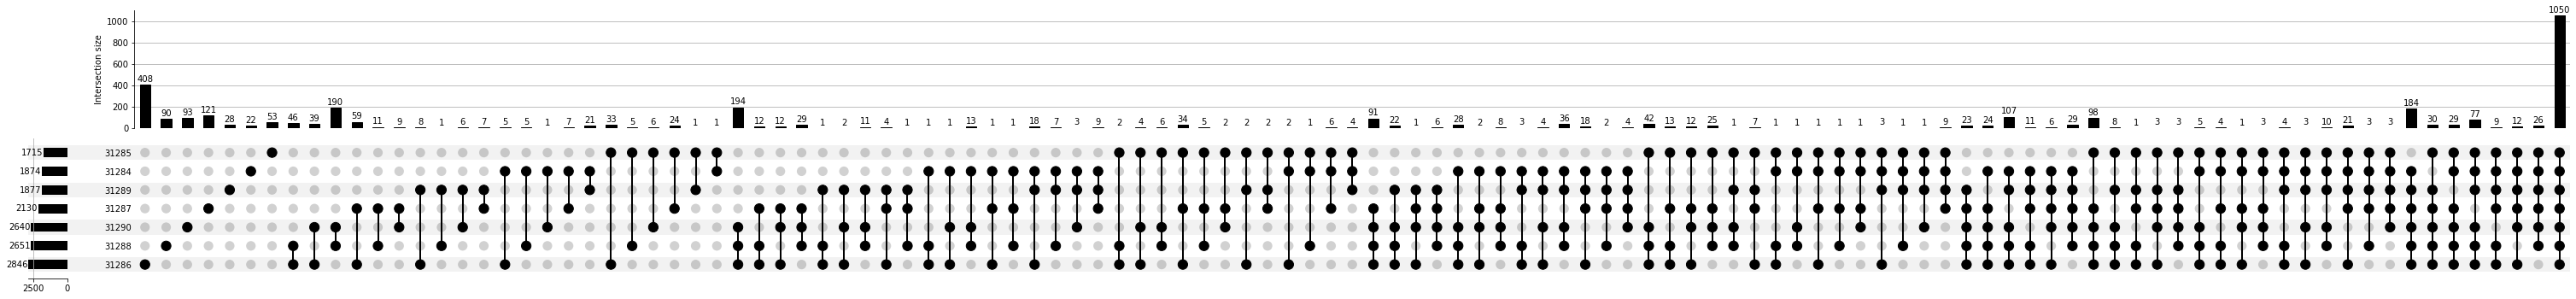

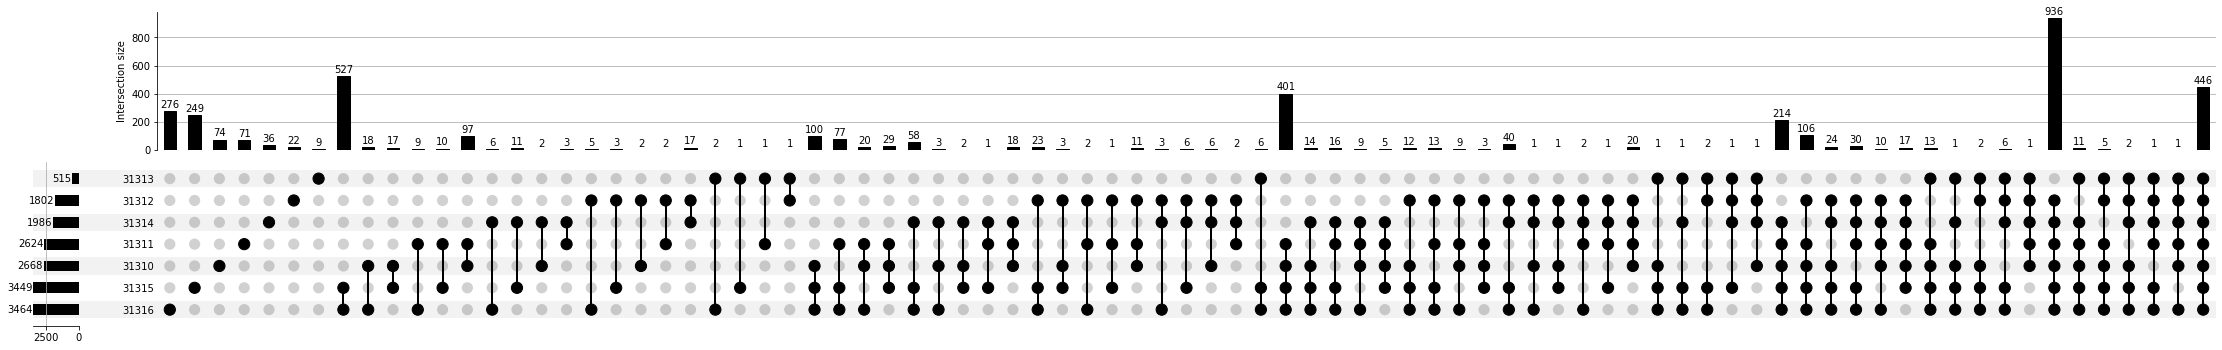

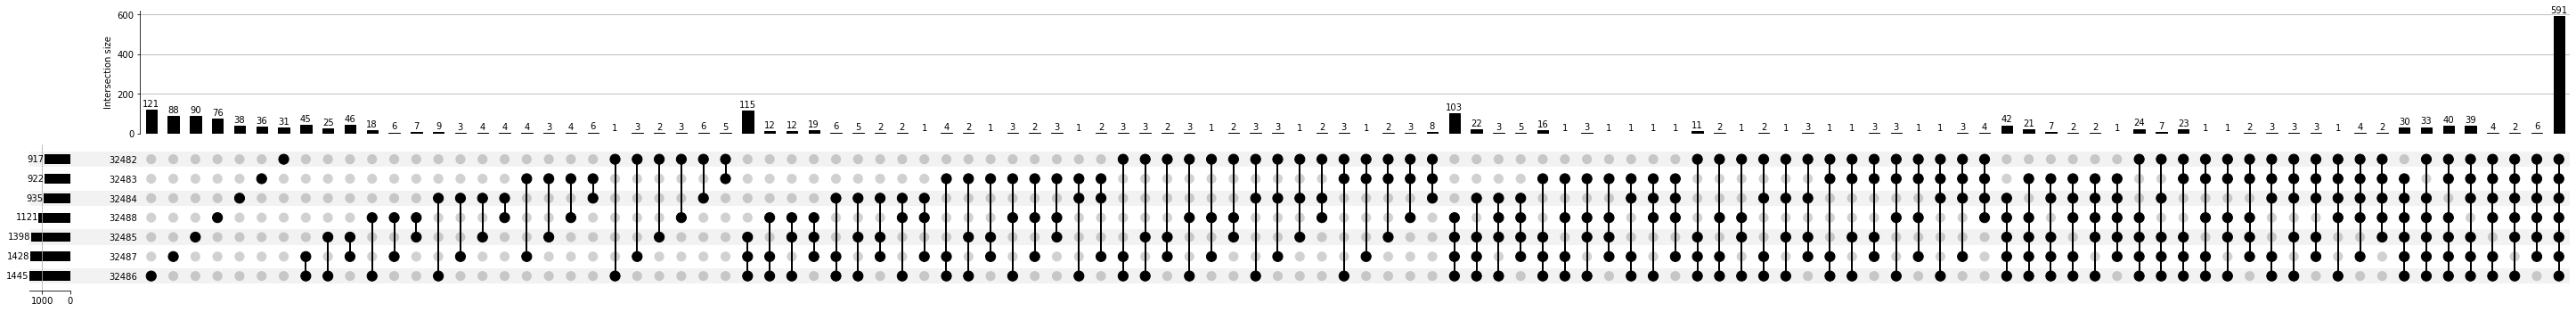

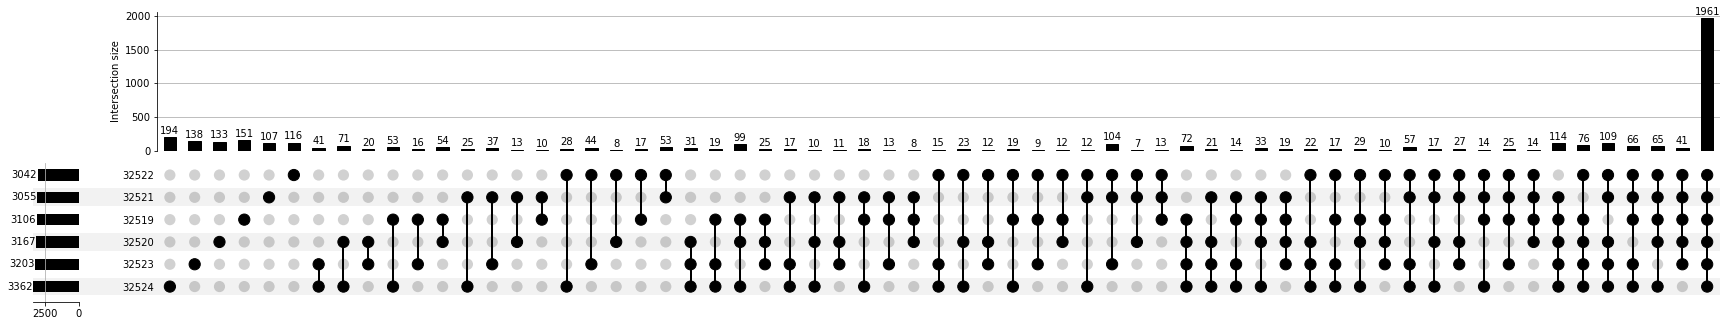

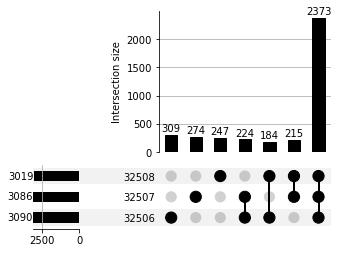

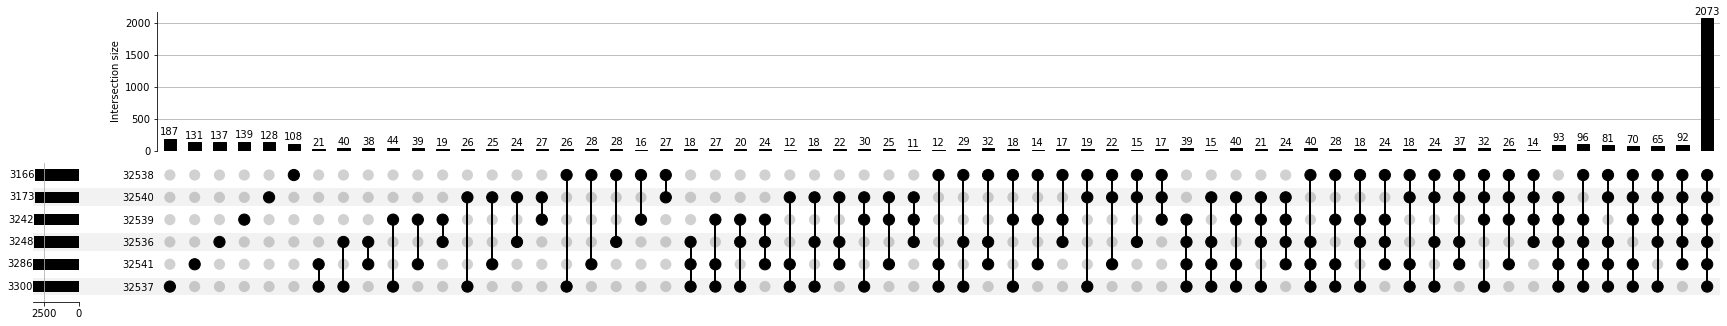

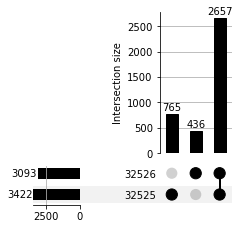

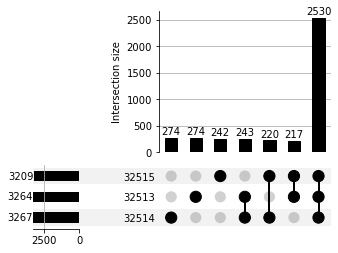

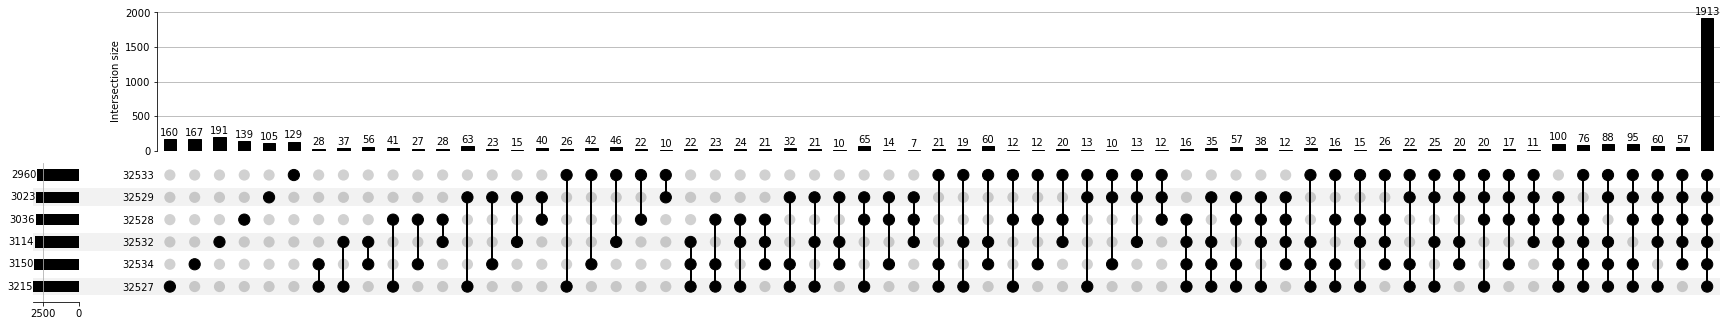

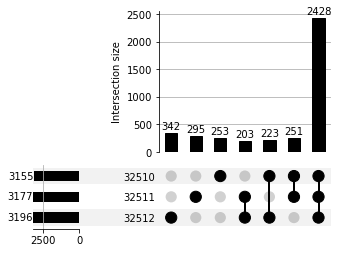

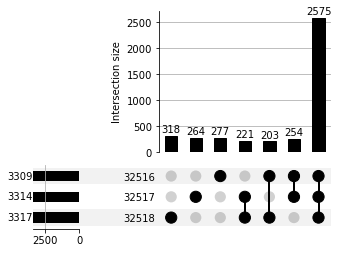

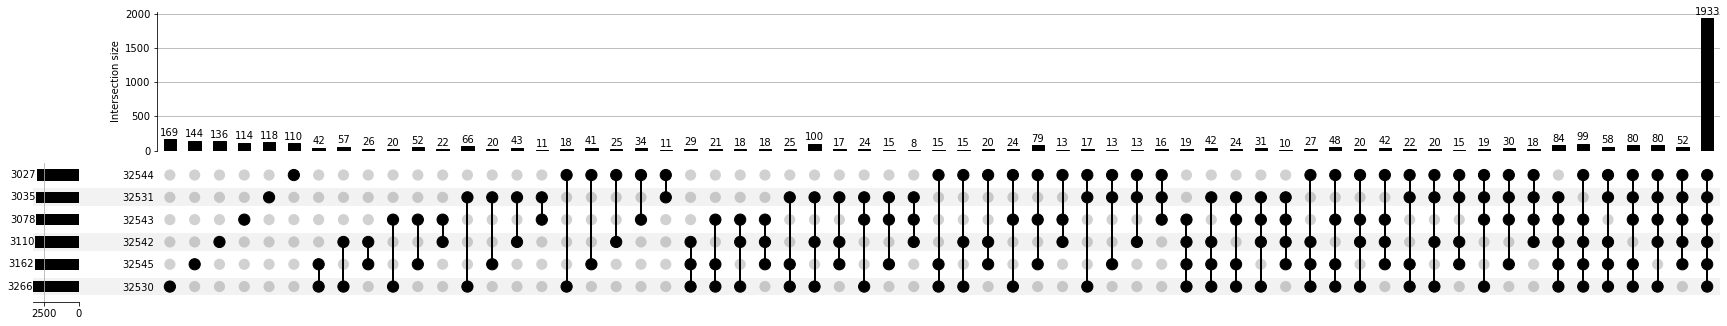

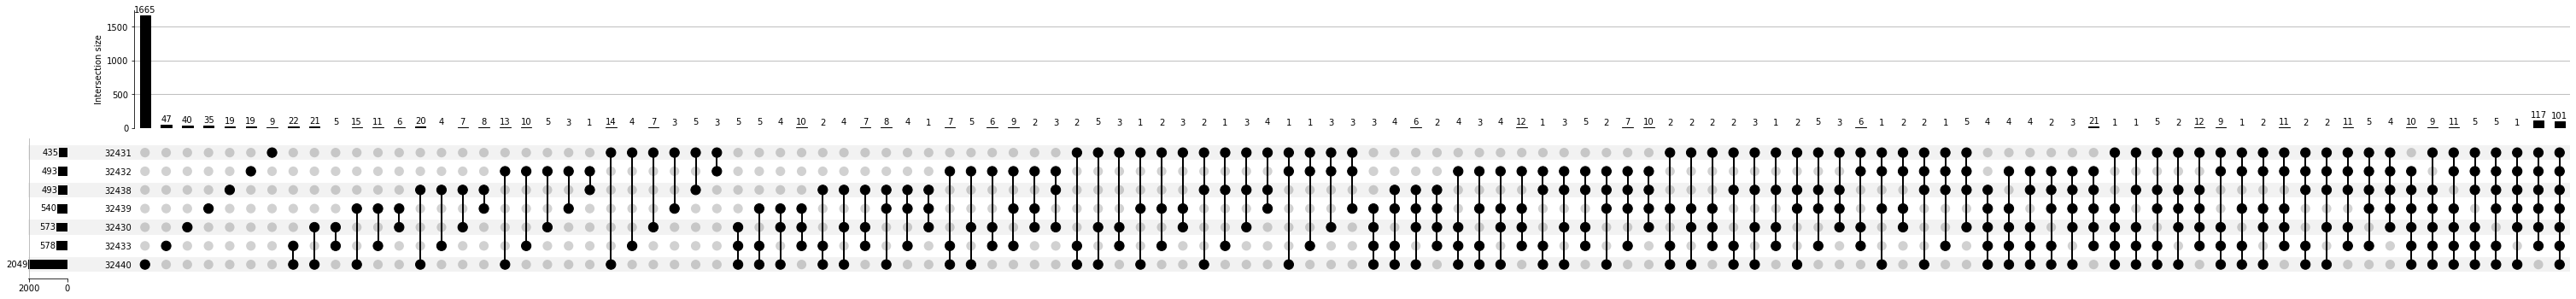

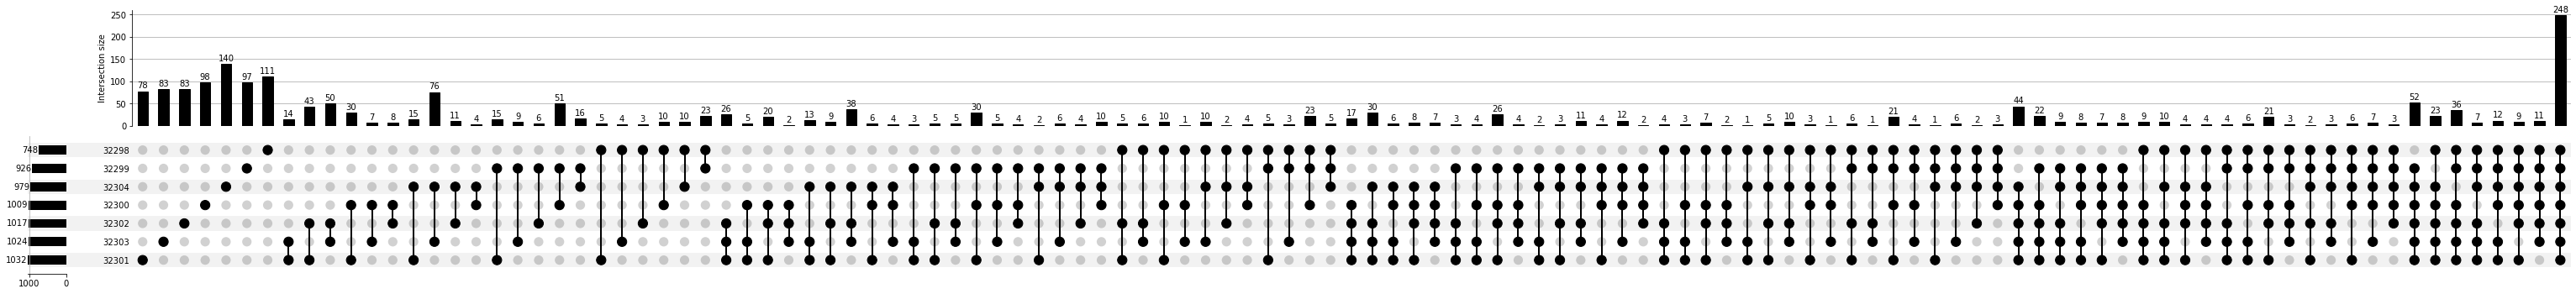

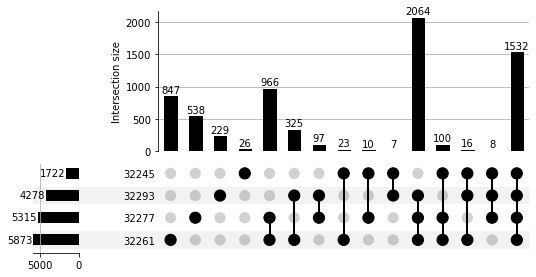

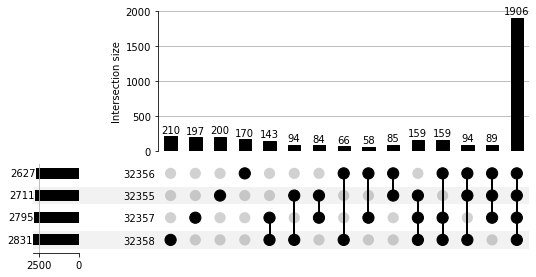

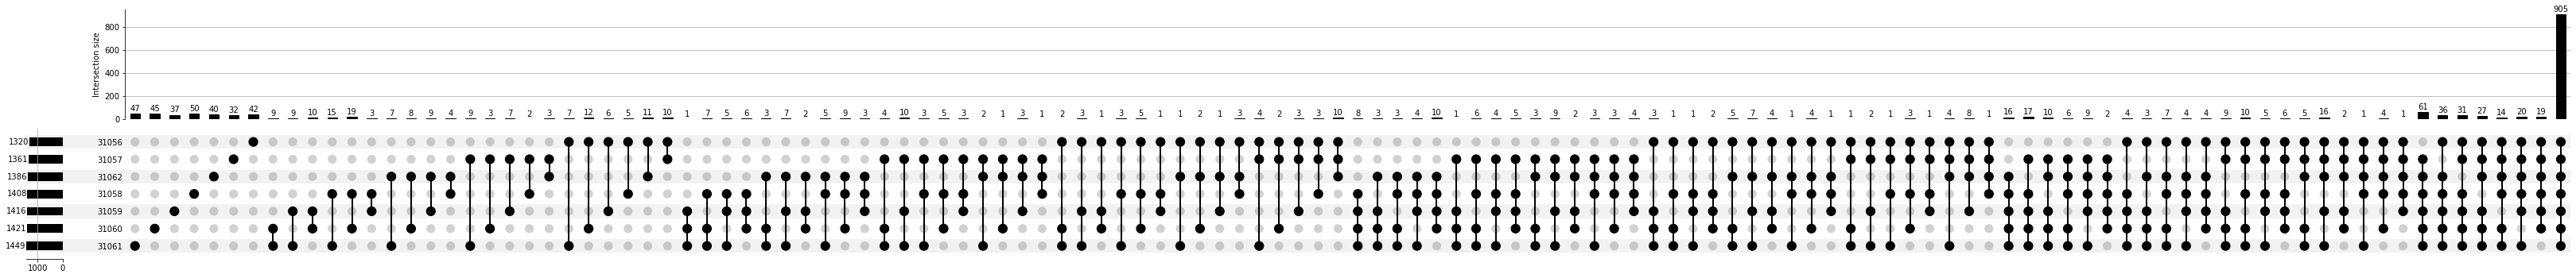

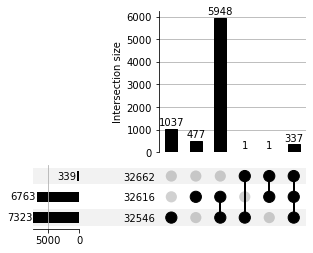

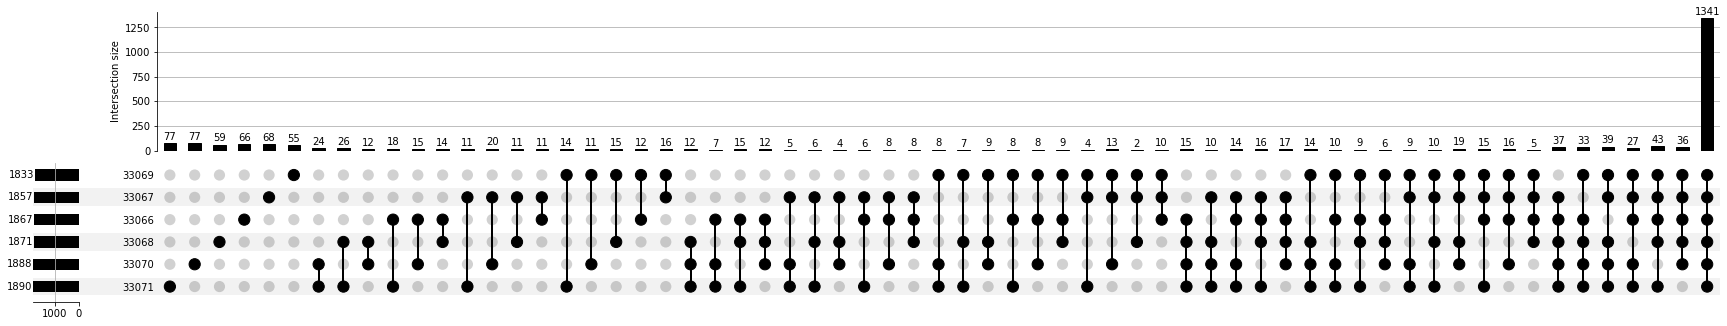

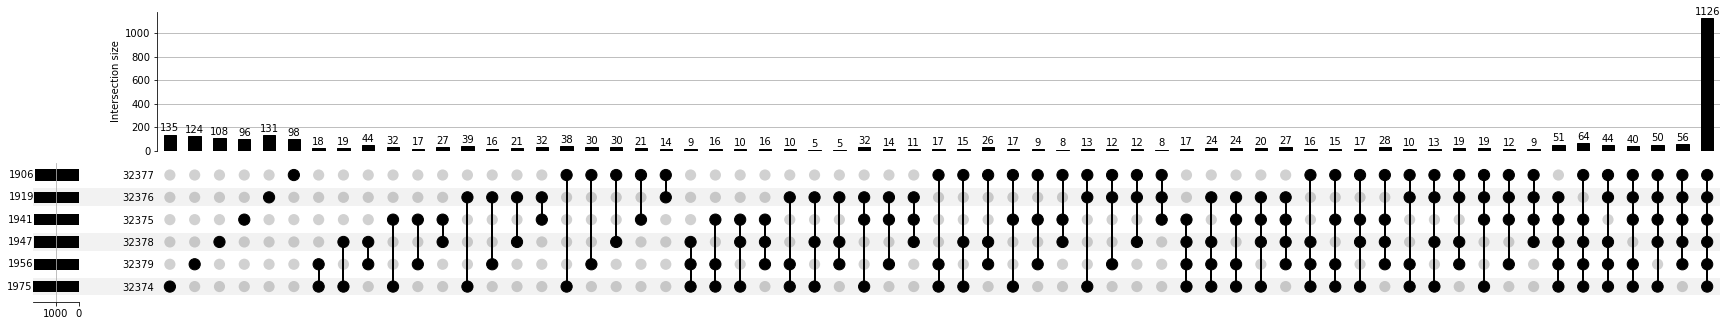

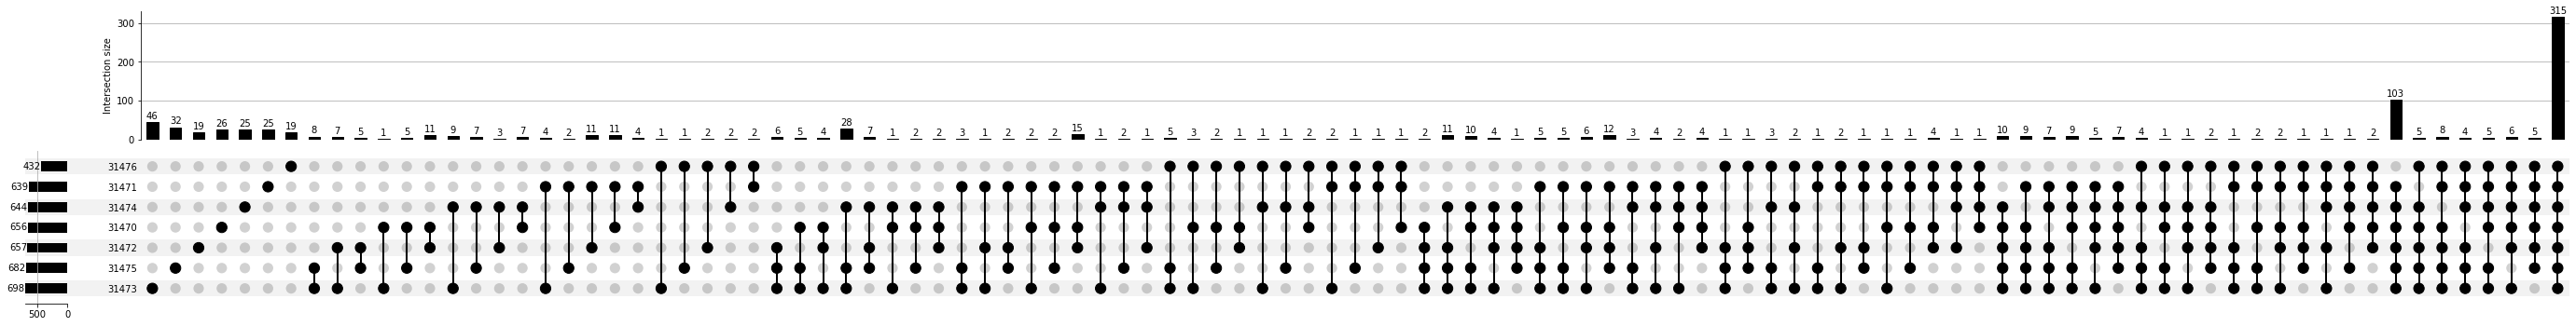

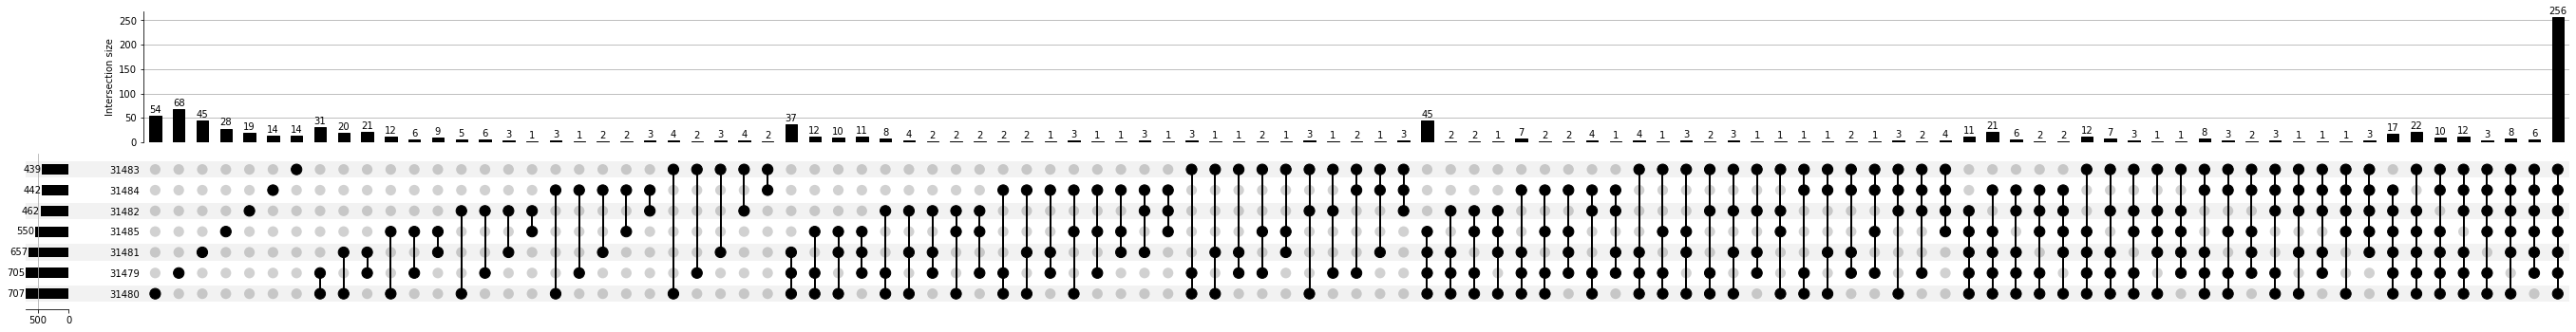

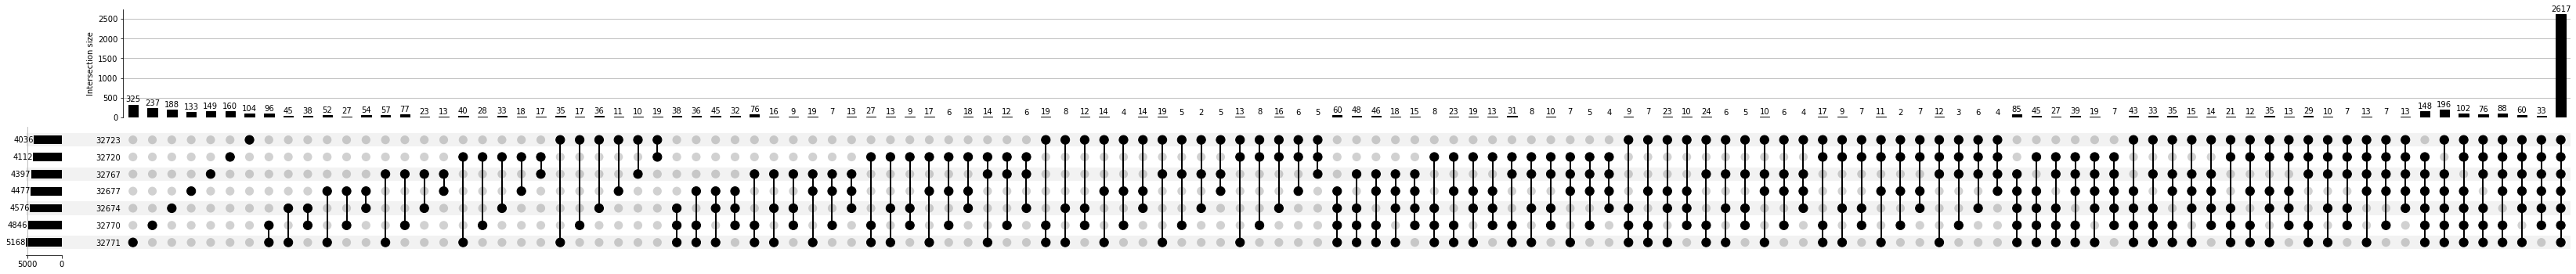

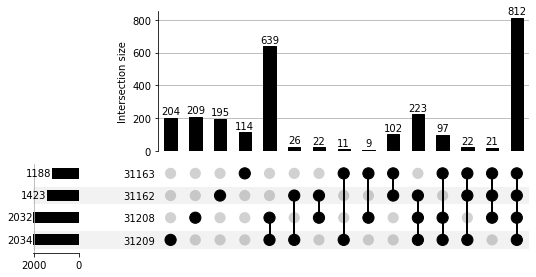

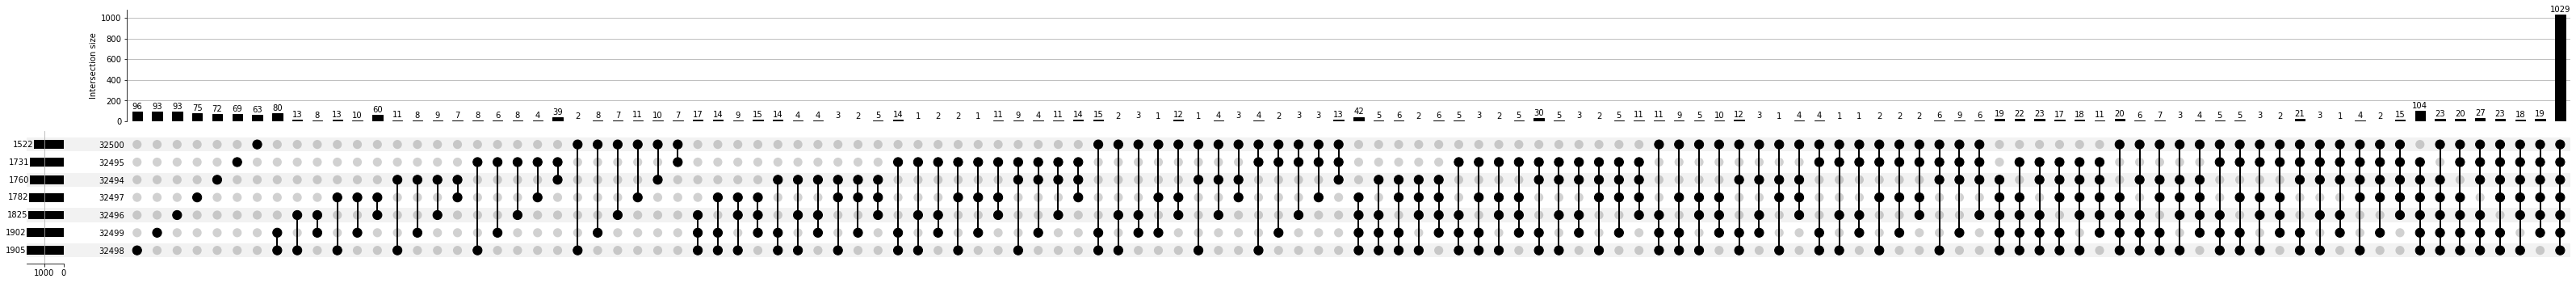

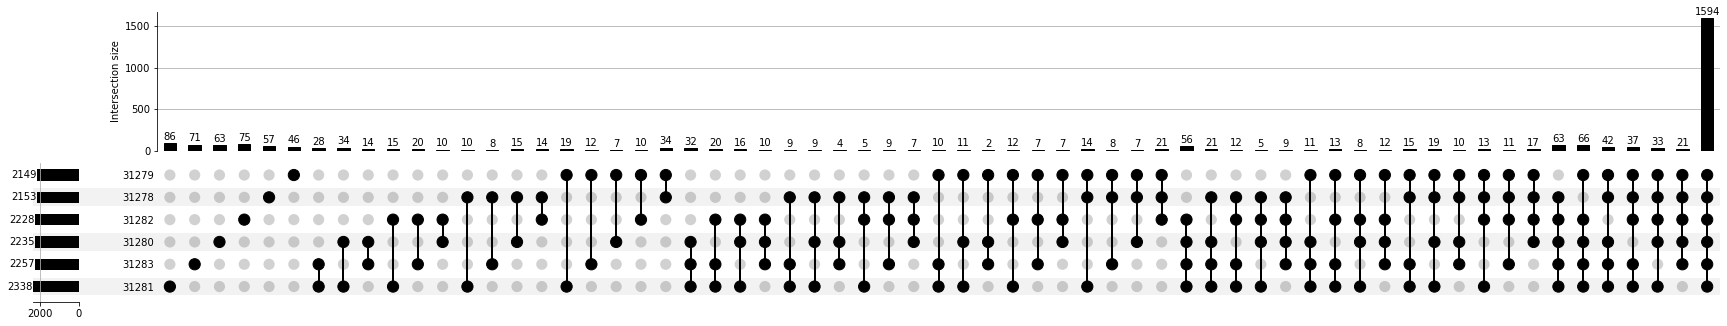

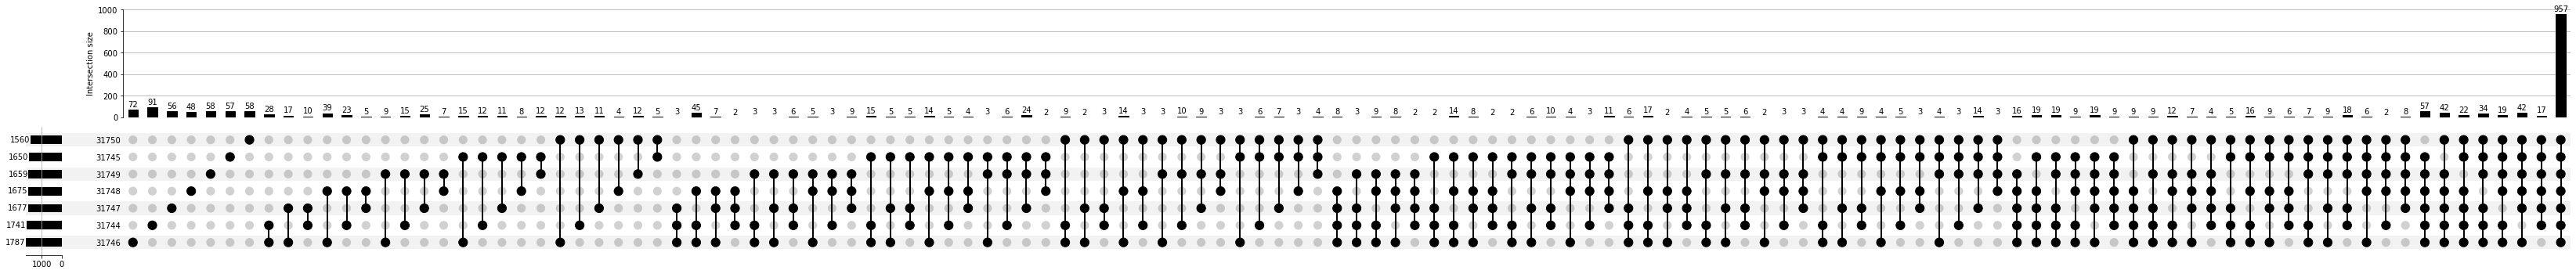

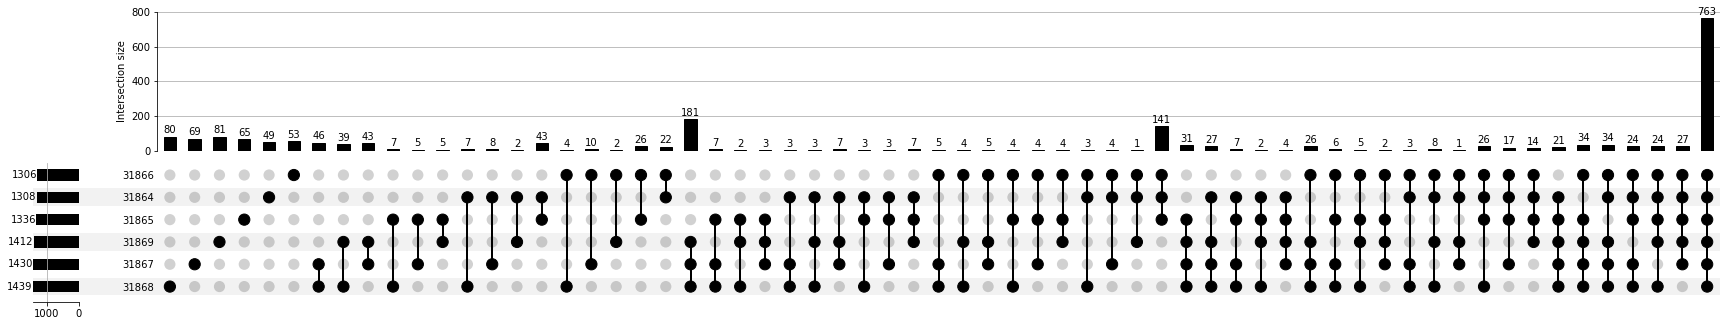

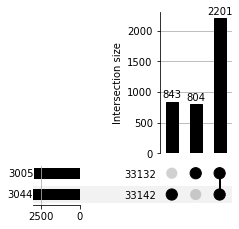

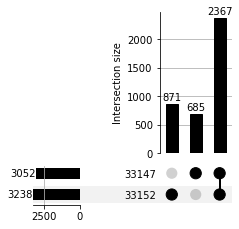

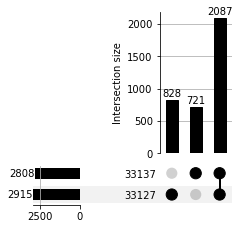

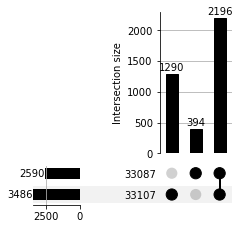

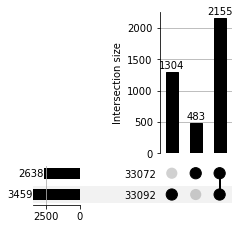

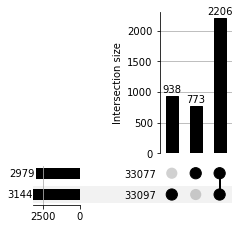

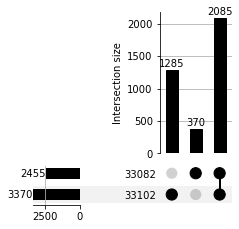

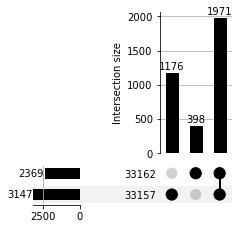

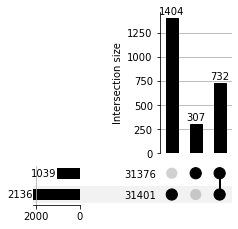

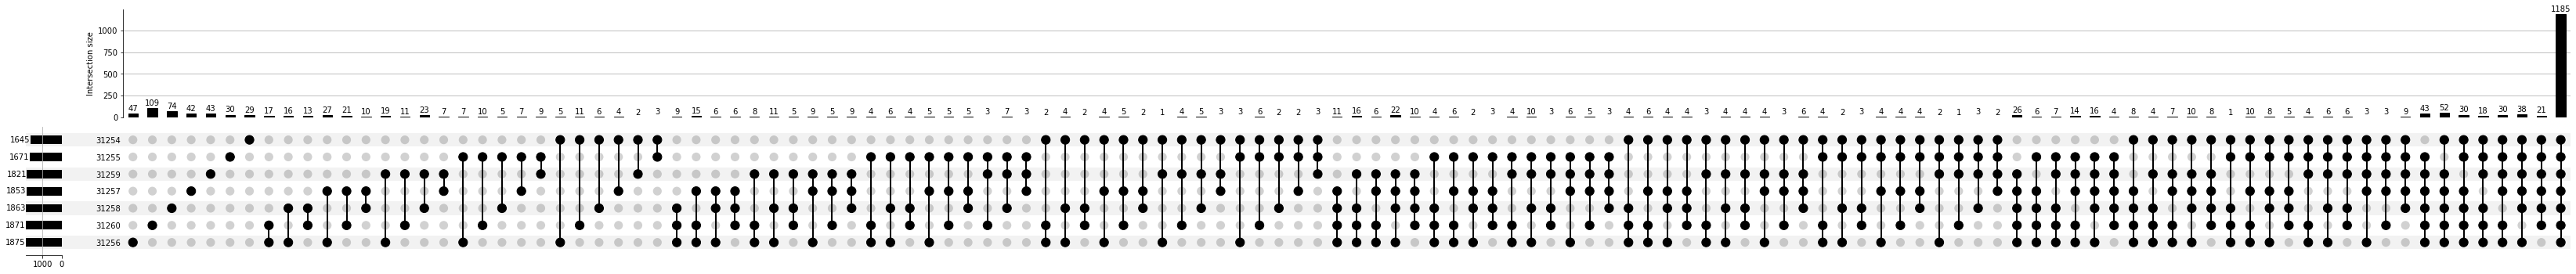

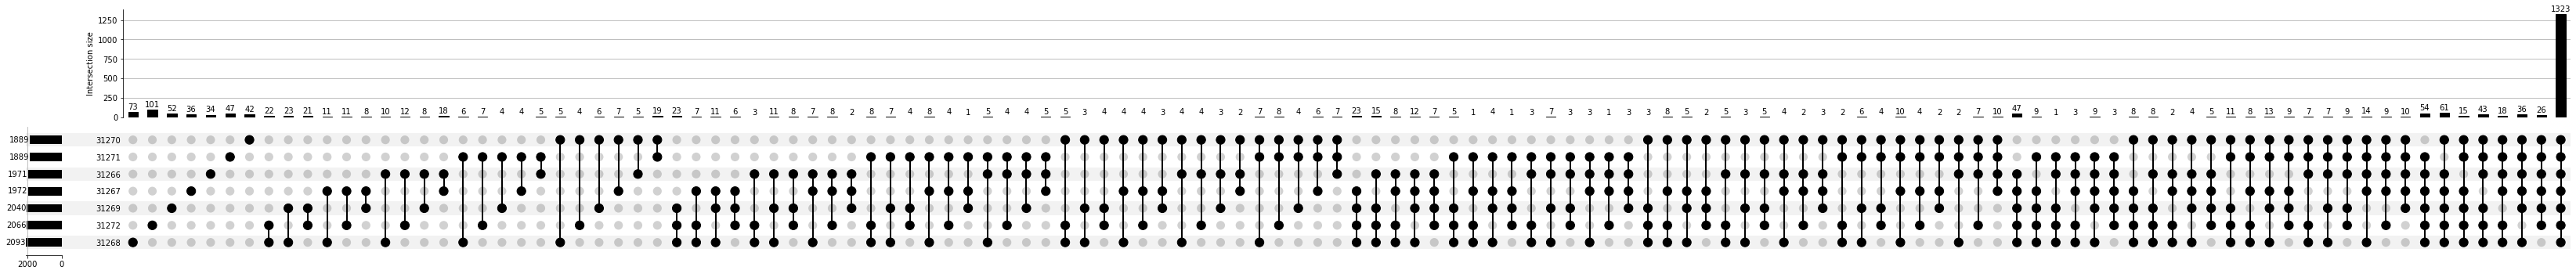

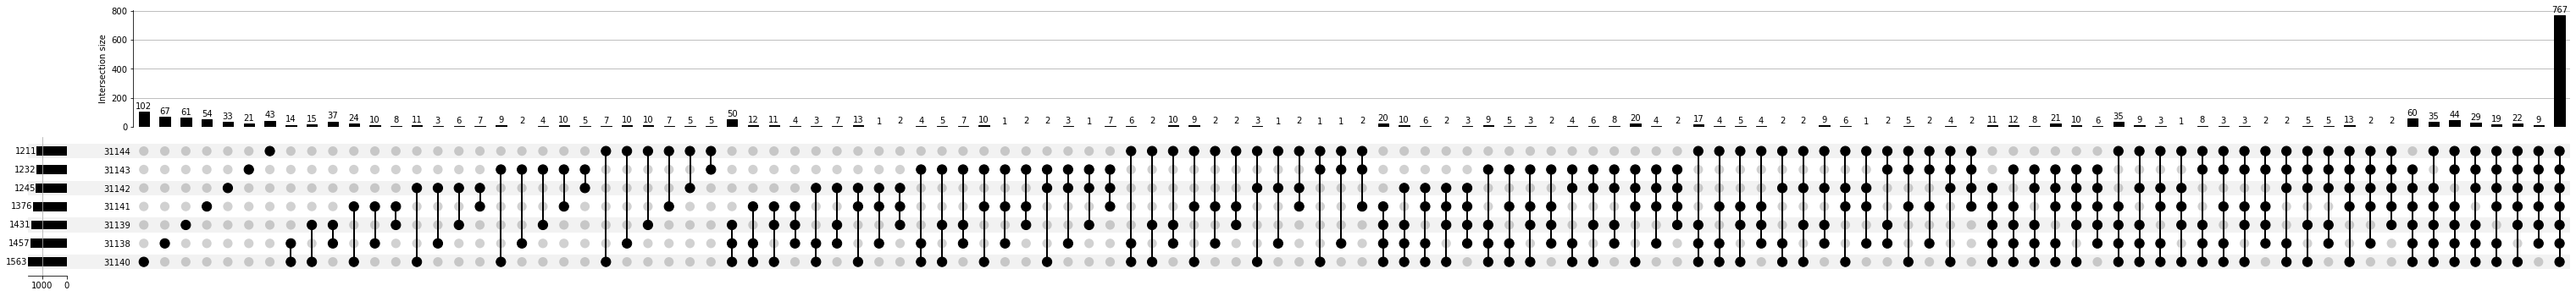

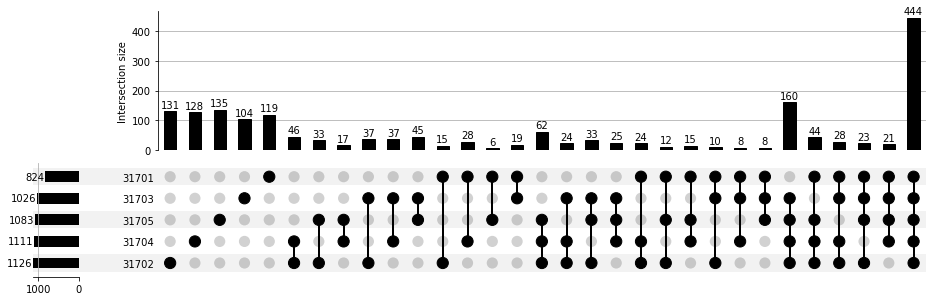

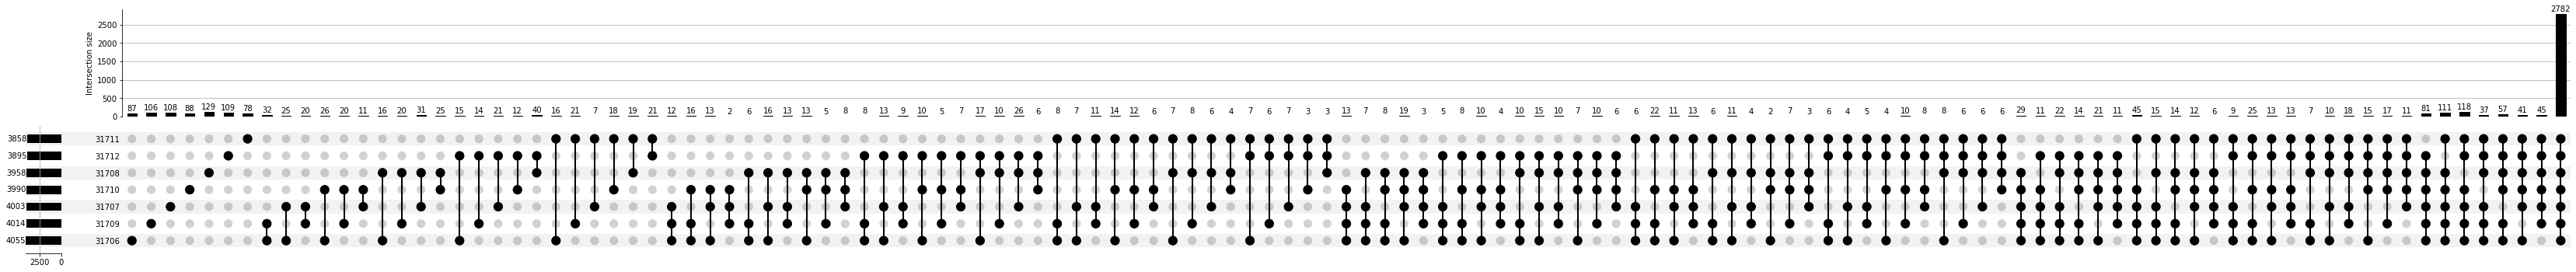

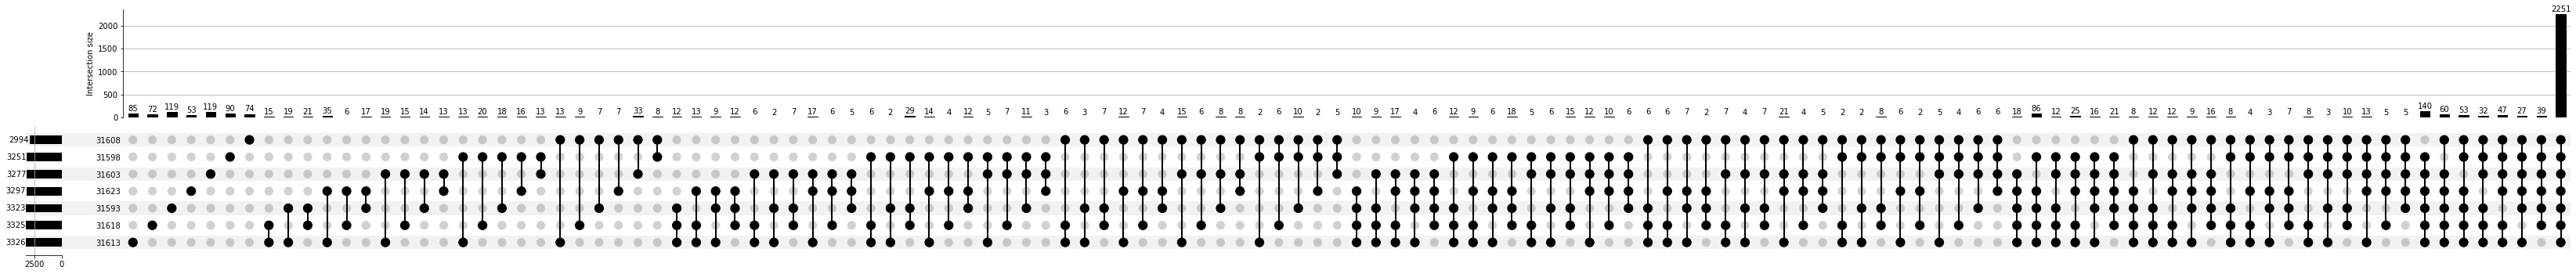

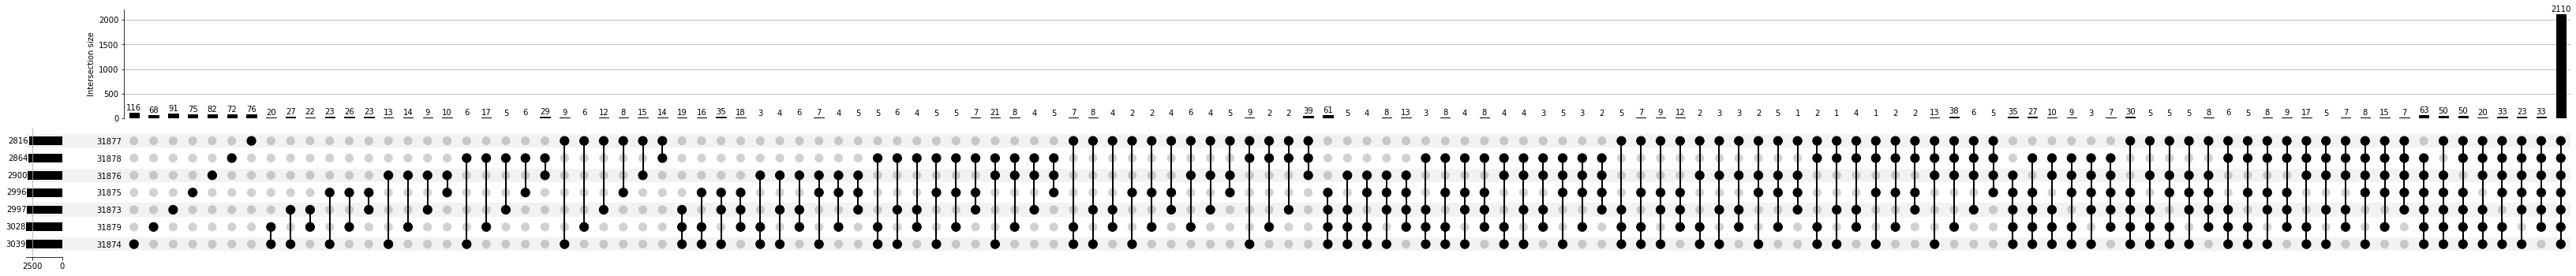

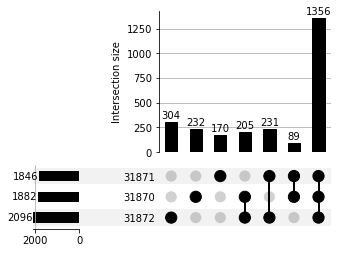

In [16]:
# Upsetplot can plot how many entries are identified only by or by a combination of samples, similar to a Venn diagram.
# Parse the data as a dictionary, with keys indicating the sample to be compared and values as identified values as booleans (generated with from_contents function based on list of values)
# Then use Upset(data, ...).plot()
# https://upsetplot.readthedocs.io/en/stable/formats.html

import upsetplot as upplt

for list_of_assays in within_project_groups:
    assayDict = {}
    if len(list_of_assays) > 1: #You need more than 1 sample for comparison
        for index, assay in enumerate(list_of_assays):

            # Store assay as key and list of identified proteins as values
            row_mask = assay
            
            if assay in data.index.tolist():
                try:
                    col_mask = data[data.index == assay].notna().values.tolist()[0]
                    assayDict[assay] = data.loc[row_mask, col_mask].index.tolist() 
                except:
                    print(f"assay: {assay} gives error")
                    continue

            if index == 6: #Otherwise the plot will explode
                print(f"project from {assay} contains {len(list_of_assays)} samples")
                break
        
        # Plot it
        if assayDict != {}:
            contents = upplt.from_contents(assayDict)
            upplt.UpSet(contents, show_counts=True).plot()

### Between datasets

In [7]:
def pxd_assay_parser(assays):
    '''Returns dict of grouped assays with keys being the PXD accession number, given a list of assays'''
    assay_pxd_mapping = pd.read_csv("more_meta.csv", usecols = ["assay_id", "PXD_accession"])
    pxdDict = {}
    for assay in assays:
        if assay not in assay_pxd_mapping.assay_id.unique():
            print(f"{assay} not found.")
            continue

        pxd_mapped = assay_pxd_mapping[assay_pxd_mapping.assay_id == assay].PXD_accession.values[0]
        if assay not in pxdDict.keys():
            pxdDict[pxd_mapped] = [assay]
            continue
        else:
            pxdDict[pxd_mapped] += [assay]
    return pxdDict

def return_common_proteins(assays, df, frequency_cutoff = .5):
    '''Returns list of protein identifications that are in percentage frequency_cutoff or more of the assays.
    
    df = dataframe where assays are indeces and each column is a protein id.'''
    
    df_proteins_ided = df[df.index.isin(assays)].notna().sum() /  len(assays)
    proteins_ided = df_proteins_ided[df_proteins_ided >= frequency_cutoff].index.tolist()
    
    return proteins_ided

Text(0.5, 1.0, 'Full dataset intersection')

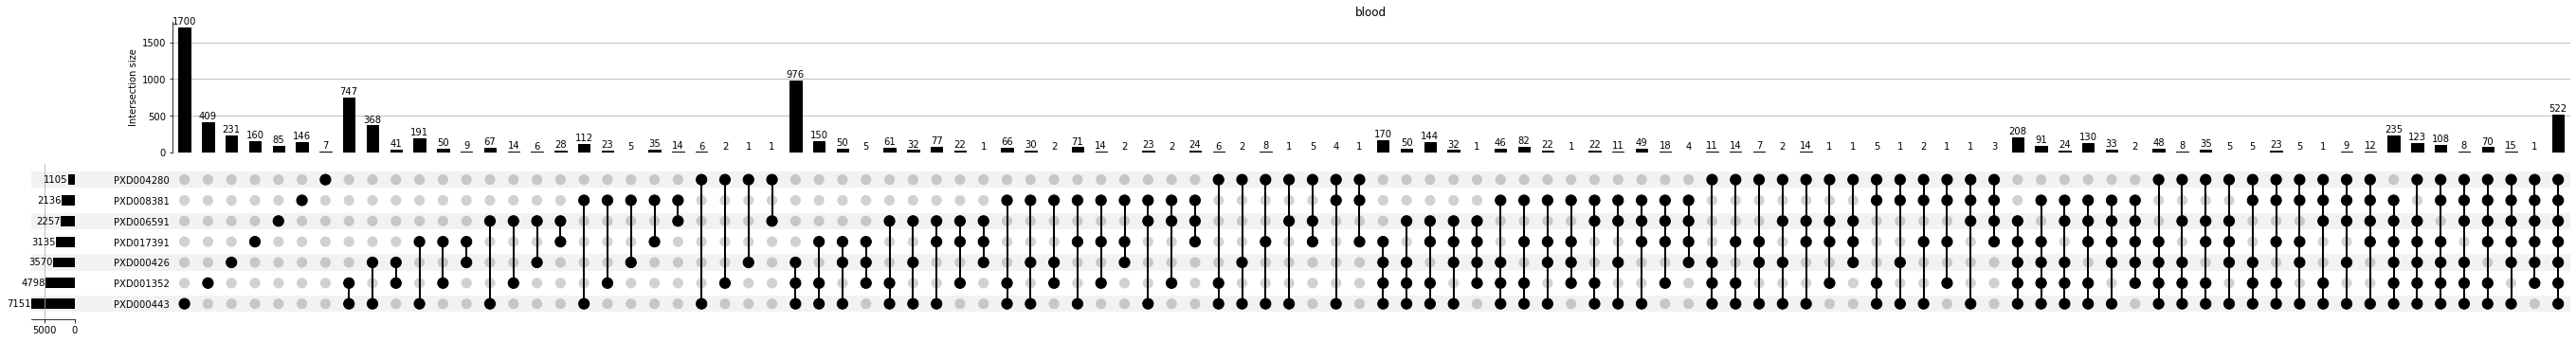

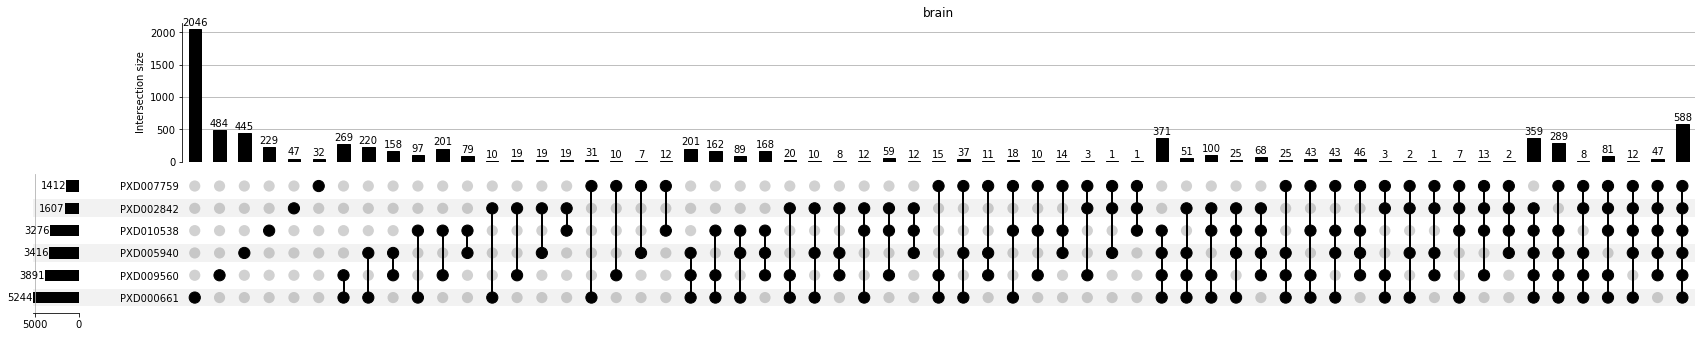

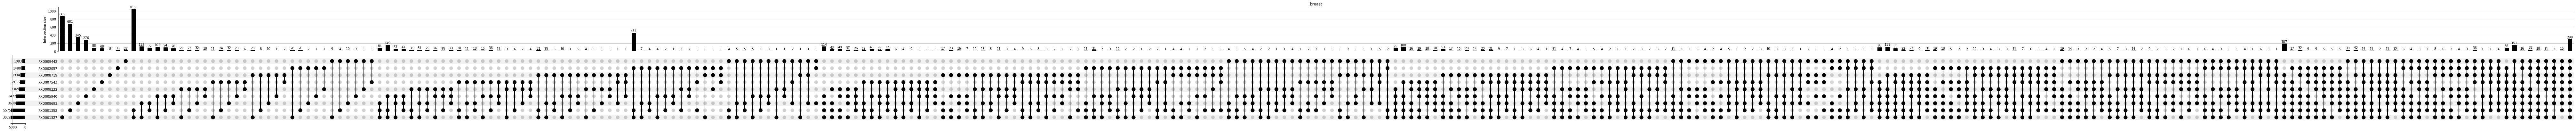

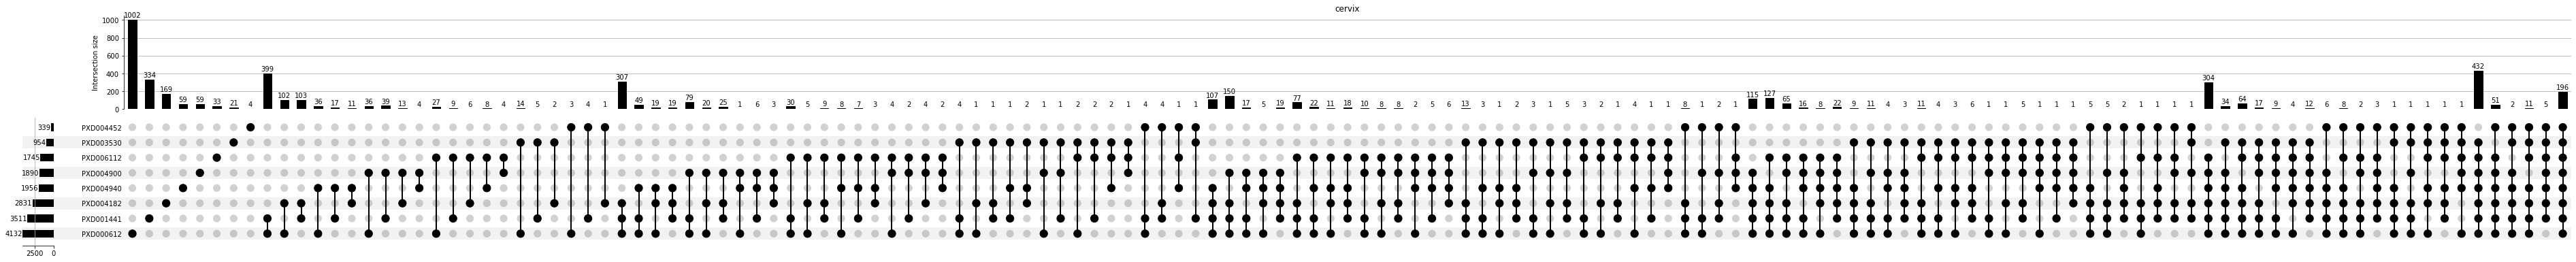

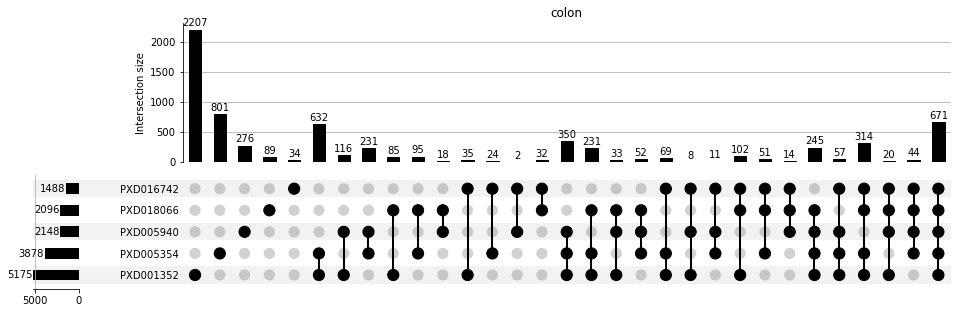

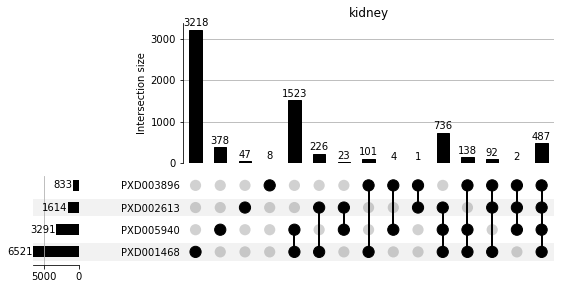

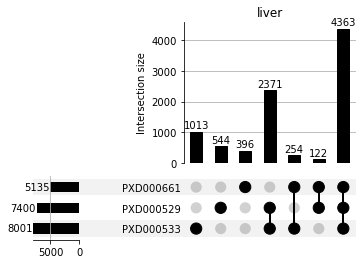

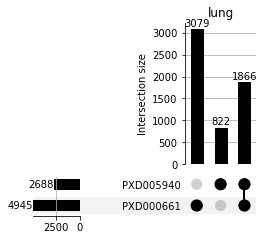

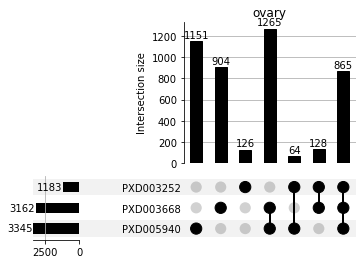

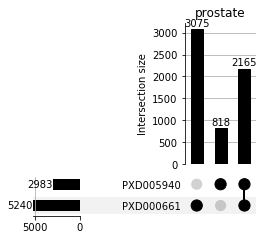

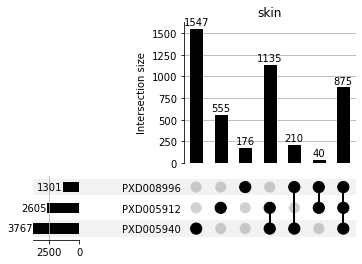

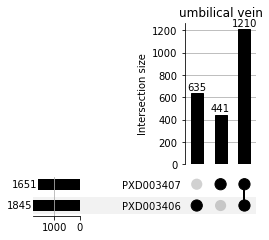

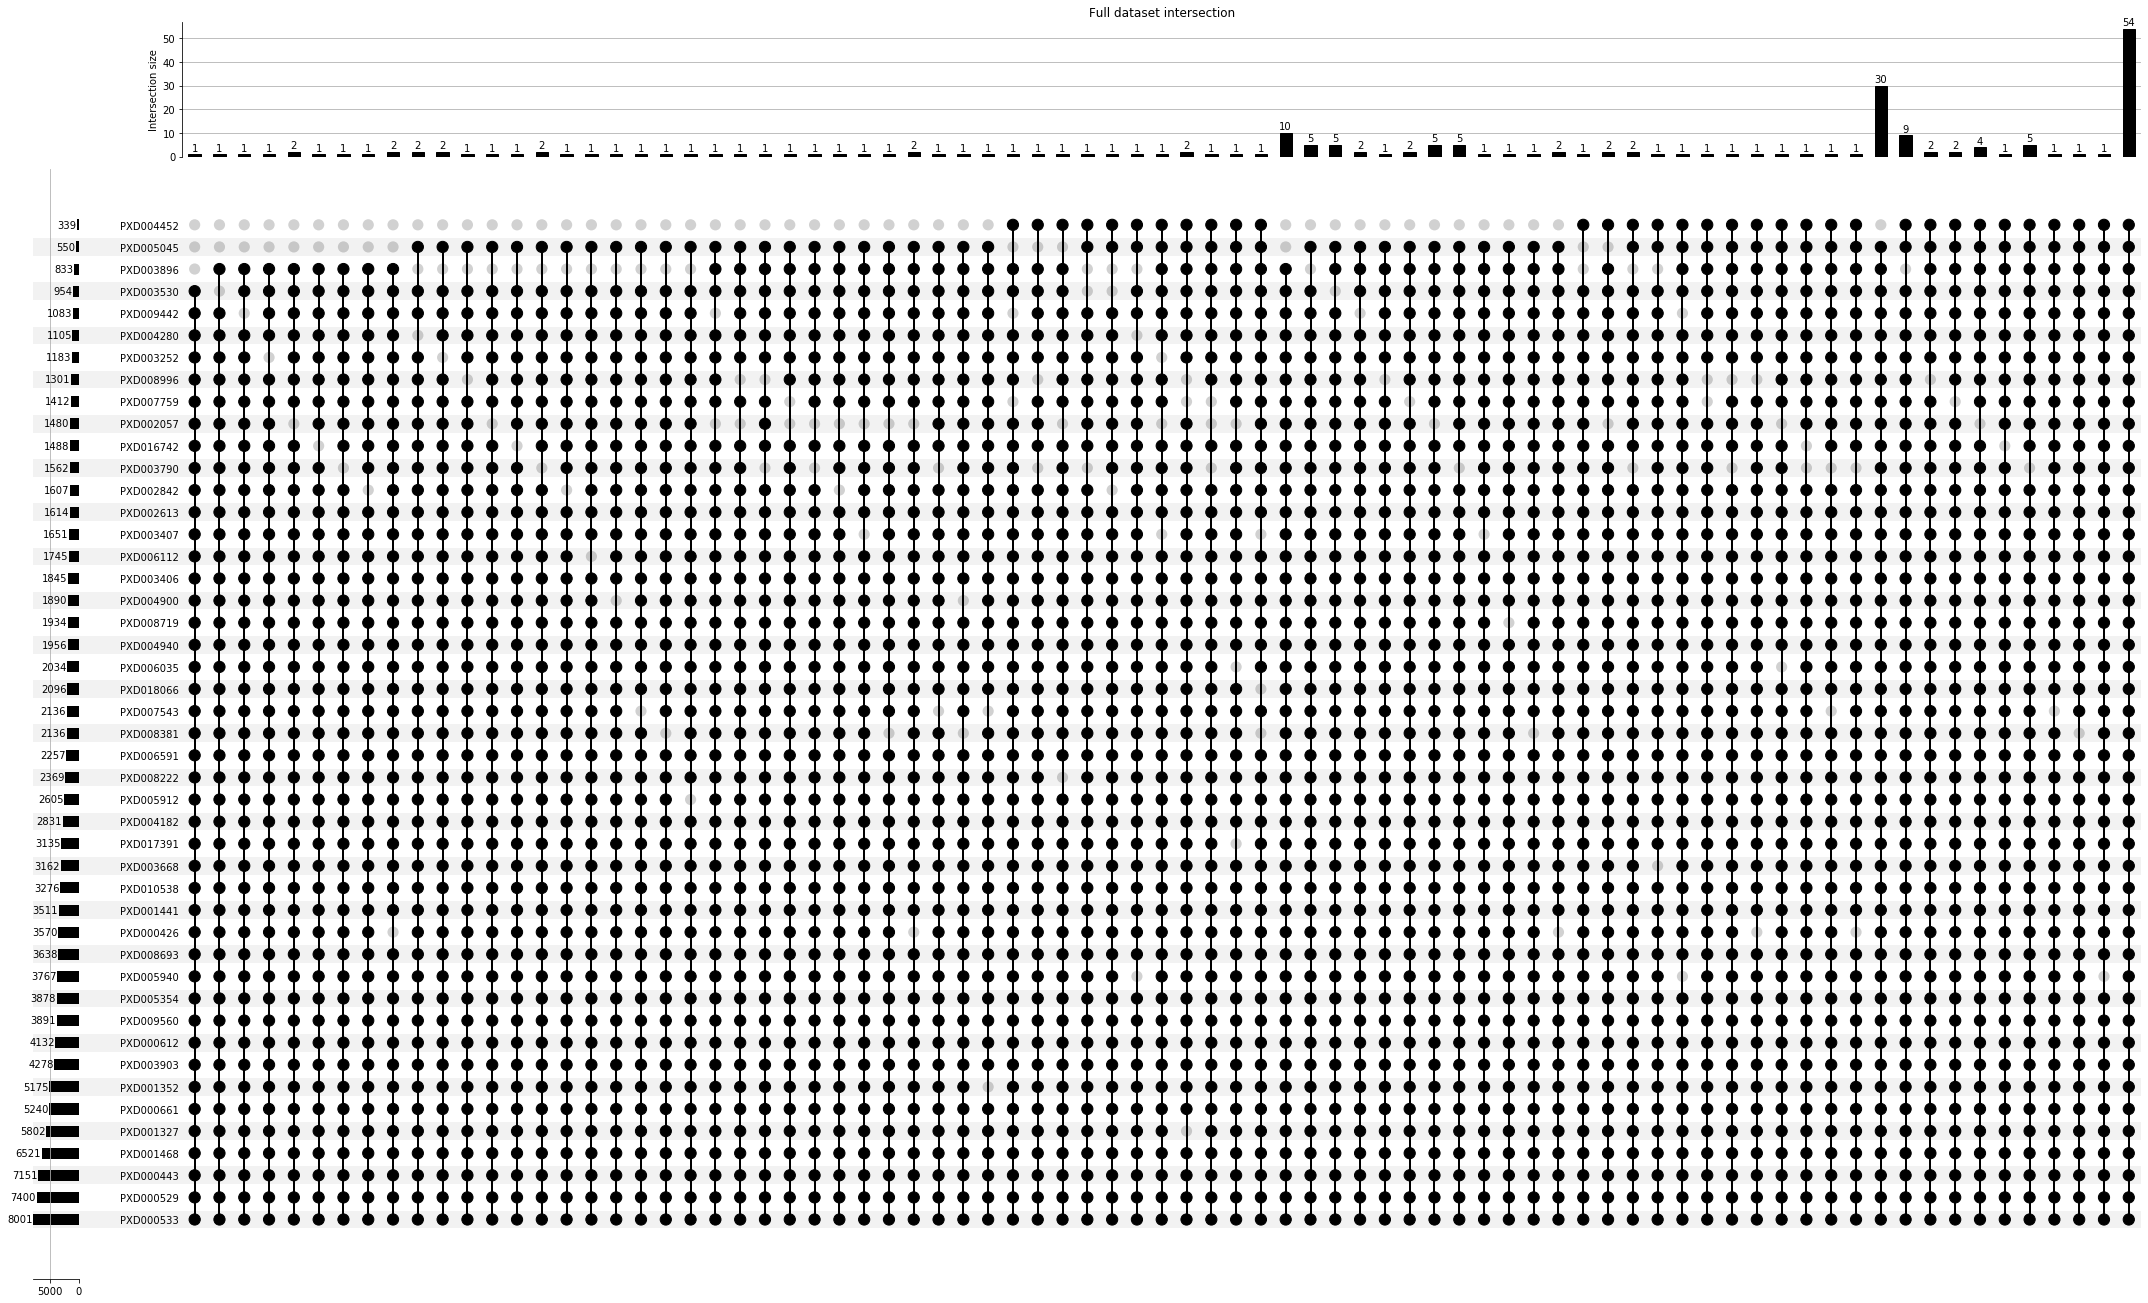

In [19]:
# Upsetplot can plot how many entries are identified only by or by a combination of samples, similar to a Venn diagram.
# Parse the data as a dictionary, with keys indicating the sample to be compared and values as identified values as booleans (generated with from_contents function based on list of values)
# Then use Upset(data, ...).plot()
# https://upsetplot.readthedocs.io/en/stable/formats.html

from matplotlib.pyplot import title
import upsetplot as upplt

between_list_of_assays = labels.reset_index().groupby(["tissue_type"]).apply(lambda x: x.assay_id.values.tolist()) # All assays grouped by tissue
assay_pxd_mapper = pd.read_csv("more_meta.csv", usecols = ["assay_id", "PXD_accession"])
tissue_names = between_list_of_assays.index.tolist()
total = {}
count = -1

for list_of_assays in between_list_of_assays:
    count += 1
    # Group assays by pxd
    grouped_dict_of_assays = pxd_assay_parser(list_of_assays)
    common_proteins_per_pxd = {}
    
    # Sum all identifications by pxd that are => 50 % of times in the assays
    # Create dictionary with pxd keys and values being above stated identifications
    for key, values in grouped_dict_of_assays.items():
        common_proteins_per_pxd[key] = return_common_proteins(assays = values, df = data, frequency_cutoff = 0.5) 

    total.update(common_proteins_per_pxd)

    # Convert with "from_contents"
    if len(common_proteins_per_pxd) < 2:
        continue
    
    contents = upplt.from_contents(common_proteins_per_pxd)

    # Create plot and observe between experiment homogenicity
    upplt.UpSet(contents, show_counts=True).plot()
    plt.title(tissue_names[count])

upplt.UpSet(upplt.from_contents(total), show_counts = True, min_degree=len(total)-3).plot()
plt.title("Full dataset intersection")

In [54]:
protein_counter = {}
for pxd, proteins in total.items():
    for protein in proteins:
        if protein not in protein_counter.keys():
            protein_counter[protein] = 1
        else:
            protein_counter[protein] += 1
protein_counter = pd.DataFrame.from_dict(protein_counter, orient = "index").reset_index().rename({0:"frequency", "index": "uniprot_id"}, axis = 1)

#Prints the proteins that are in every sample in the full dataset
protein_counter[protein_counter.frequency == protein_counter.frequency.max()].uniprot_id.tolist()

['O43242',
 'P00558',
 'P04406',
 'P06576',
 'P07900',
 'P07954',
 'P08238',
 'P13010',
 'P13639',
 'P14174',
 'P18206',
 'P22102',
 'P22314',
 'P23526',
 'P24534',
 'P25398',
 'P25705',
 'P26641',
 'P30041',
 'P30050',
 'P30084',
 'P30086',
 'P31689',
 'P31948',
 'P35579',
 'P40227',
 'P40926',
 'P45974',
 'P49411',
 'P49915',
 'P50991',
 'P51858',
 'P52907',
 'P53396',
 'P54886',
 'P55060',
 'P60174',
 'P61981',
 'P62701',
 'P62805',
 'Q08211',
 'Q08J23',
 'Q09666',
 'Q14566',
 'Q15365',
 'Q562R1',
 'Q7KZF4',
 'Q8NC51',
 'Q99832',
 'Q9HB71',
 'Q9P258',
 'Q9Y230',
 'Q9Y3I0',
 'Q9Y490']

---

In [ ]:
pd.concat([data, labels], axis = 1)[pd.concat([data, labels], axis = 1).A0A075B6X5.notna()]

In [7]:
data["normalizer"] = 1

In [202]:
proteins_per_tissue = pd.concat([data, labels], axis = 1).groupby(["tissue_type"]).count()
normalizer = pd.concat([data, labels], axis = 1).groupby(["tissue_type"]).count().normalizer.values.reshape(17,1)
ppt_heatmap = proteins_per_tissue/normalizer

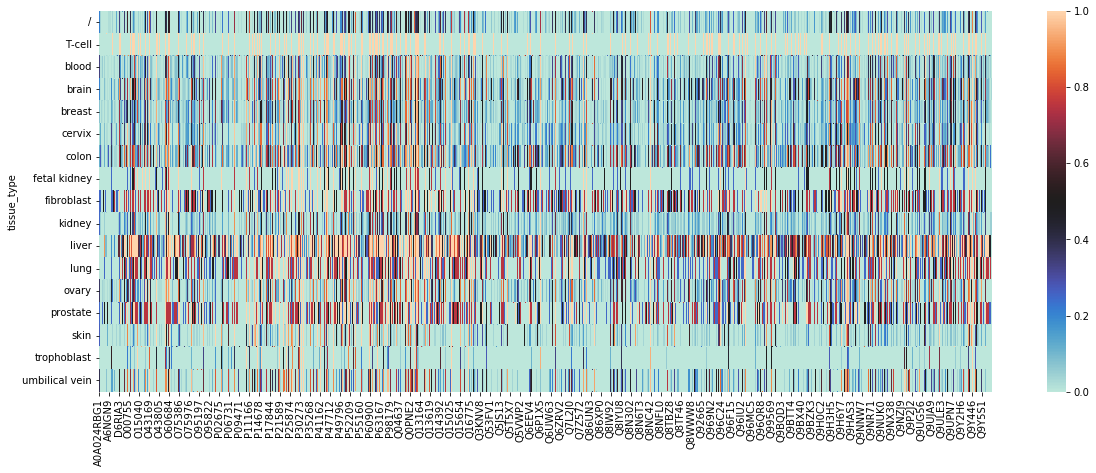

In [205]:
plt.figure(figsize = (20,7))
sns.heatmap(ppt_heatmap.iloc[:,:-1], cmap = "icefire")

RED/yellow represents the proteins that are available in most assays of a given tissue <br>

Blue represents low representability of the protein in the assays grouped by tissue

In [167]:
pd.concat([data, labels], axis = 1).groupby(["tissue_type"]).count() / pd.concat([data, labels,1], axis = 1).groupby(["tissue_type"]).count()

A0A024RBG1  A0A075B6X5  A0A096LP01  A0A096LP49  A0A0A6YYK6  \
tissue_type                                                                  
/                 1.333333    0.333333    0.000000    0.333333    0.333333   
T-cell            0.000000    0.000000    0.000000    0.000000    0.000000   
blood             0.000000    0.333333    0.000000    0.000000    0.000000   
brain             0.000000    0.000000    0.000000    0.000000    0.666667   
breast            2.666667    0.333333    0.000000    0.000000    1.000000   
cervix            0.333333    0.000000    0.000000    0.000000    0.000000   
colon             3.333333    0.666667    0.000000    0.000000    0.000000   
fetal kidney      0.000000    0.000000    0.000000    0.000000    0.000000   
fibroblast        0.333333    0.000000    0.000000    0.000000    0.000000   
kidney            0.333333    0.666667    0.000000    0.000000    0.000000   
liver             1.666667    0.333333    1.666667    0.666667    0.666667   
lung              0.000000    0.000000    0.666667    0.000000    0.000000   
ovary             0.000000    0.000000    0.000000    0.333333    0.333333   
prostate          0.000000    0.000000    0.666667    0.000000    0.000000   
skin              0.333333    0.000000    0.000000    0.000000    0.000000   
trophoblast       0.000000    0.333333    0.000000    0.000000    0.000000   
umbilical vein    4.666667    0.000000    0.000000    0.000000    0.000000   

                A0A0B4J1V0  A0A0B4J2F0  A0A0J9YWL9  A0A0J9YX94  A0A0U1RRE5  \
tissue_type                                                                  
/                 0.000000    0.333333    0.666667    0.666667    0.333333   
T-cell            0.000000    0.333333    0.000000    0.000000    0.000000   
blood             0.000000    0.666667    0.000000    0.000000    5.000000   
brain             0.000000    6.333333    0.000000    1.000000    7.000000   
breast            0.000000    4.000000    0.666667    0.333333    1.333333   
cervix            0.333333    5.333333    0.000000    1.000000    3.000000   
colon             0.000000    3.666667    0.000000    0.000000    0.333333   
fetal kidney      0.333333    0.000000    0.333333    0.000000    0.333333   
fibroblast        0.000000    0.666667    0.000000    0.000000    0.666667   
kidney            0.000000    0.000000    0.000000    0.000000    0.666667   
liver             1.000000    0.333333    1.000000    0.000000    0.333333   
lung              0.000000    0.333333    0.000000    0.000000    0.333333   
ovary             0.000000    0.666667    0.000000    0.000000    5.666667   
prostate          0.000000    0.000000    0.000000    0.000000    0.333333   
skin              0.000000    0.000000    0.000000    0.000000    0.000000   
trophoblast       0.000000    0.000000    0.000000    0.000000    0.000000   
umbilical vein    0.000000    0.000000    0.000000    0.000000    0.000000   

                ...    Q9Y6X4    Q9Y6X5     Q9Y6X8     Q9Y6X9     Q9Y6Y0  \
tissue_type     ...                                                        
/               ...  0.000000  0.333333   0.333333   4.000000   5.666667   
T-cell          ...  0.000000  0.000000   0.333333   0.333333   0.000000   
blood           ...  1.000000  8.666667   0.333333   4.000000  12.333333   
brain           ...  0.000000  0.666667   2.666667  13.333333  17.333333   
breast          ...  0.666667  4.000000  12.000000  21.333333  14.000000   
cervix          ...  0.000000  0.333333   2.333333   5.000000   6.333333   
colon           ...  2.000000  6.666667   5.333333   8.000000   6.333333   
fetal kidney    ...  0.000000  0.000000   0.000000   0.666667   0.666667   
fibroblast      ...  0.000000  1.000000   1.000000   1.000000   1.333333   
kidney          ...  0.333333  1.333333   0.666667   1.666667   1.333333   
liver           ...  1.666667  0.666667   2.666667   3.666667   2.666667   
lung            ...  1.000000  0.000000   1.000000   1.333333 

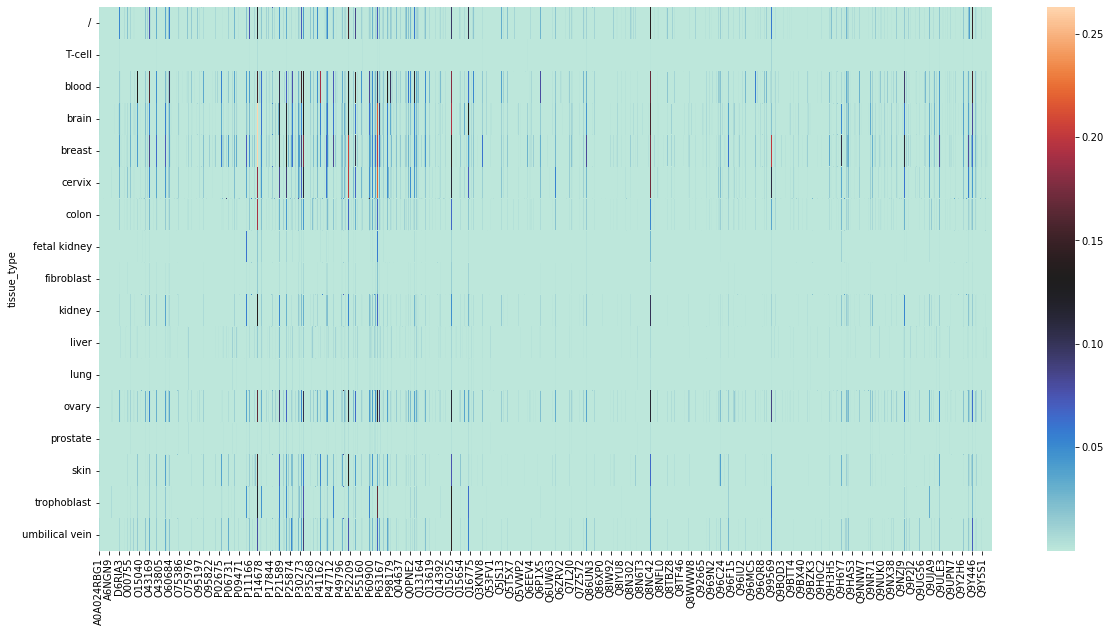

In [165]:
plt.figure(figsize = (20,10))
sns.heatmap(pd.concat([data, labels], axis = 1).groupby(["tissue_type"]).sum(), vmin=data.values[data.notna()].min(), vmax = data.values[data.notna()].max(), cmap = "icefire")

---

In [8]:
#data = data.iloc[:,:-1]
data.fillna(0, inplace = True)
data.head()

A0A024RBG1  A0A075B6X5  A0A096LP01  A0A096LP49  A0A0A6YYK6  \
assay_id                                                               
30960       0.000010         0.0    0.000000         0.0         0.0   
30961       0.000000         0.0    0.000000         0.0         0.0   
31008       0.000011         0.0    0.000061         0.0         0.0   
31009       0.000011         0.0    0.000080         0.0         0.0   
31056       0.000000         0.0    0.000000         0.0         0.0   

          A0A0B4J1V0  A0A0B4J2F0  A0A0J9YWL9  A0A0J9YX94  A0A0U1RRE5  ...  \
assay_id                                                              ...   
30960       0.000000         0.0    0.000000         0.0         0.0  ...   
30961       0.000000         0.0    0.000000         0.0         0.0  ...   
31008       0.000016         0.0    0.000002         0.0         0.0  ...   
31009       0.000016         0.0    0.000002         0.0         0.0  ...   
31056       0.000000         0.0    0.000000         0.0         0.0  ...   

            Q9Y6X4    Q9Y6X5    Q9Y6X8    Q9Y6X9    Q9Y6Y0    Q9Y6Y1  \
assay_id                                                               
30960     0.000070  0.000016  0.000028  0.000040  0.000062  0.000000   
30961     0.000068  0.000016  0.000033  0.000042  0.000045  0.000001   
31008     0.000000  0.000000  0.000007  0.000024  0.000045  0.000000   
31009     0.000000  0.000000  0.000005  0.000035  0.000033  0.000000   
31056     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            Q9Y6Y8    Q9Y6Y9  Q9Y6Z7  W5XKT8  
assay_id                                      
30960     0.000088  0.000000     0.0     0.0  
30961     0.000075  0.000000     0.0     0.0  
31008     0.000092  0.000024     0.0     0.0  
31009     0.000076  0.000024     0.0     0.0  
31056     0.000350  0.000000     0.0     0.0  

[5 rows x 13166 columns]

In [9]:
labels

assay_id
30960     liver
30961     liver
31008     liver
31009     liver
31056     blood
          ...  
33983     ovary
33986      skin
33989    breast
34076    T-cell
34079     colon
Name: tissue_type, Length: 510, dtype: object

breast            83
blood             74
brain             63
ovary             49
/                 48
cervix            47
umbilical vein    28
skin              26
colon             26
kidney            20
trophoblast       18
liver             11
fibroblast         4
lung               4
fetal kidney       4
prostate           4
T-cell             1
Name: tissue_type, dtype: int64


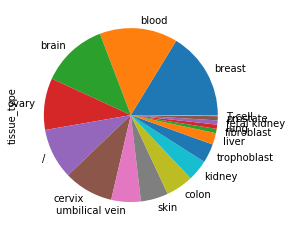

In [216]:
print(labels.value_counts())
labels.value_counts().plot(kind ="pie")

Drop tissues with less than 5 assays, because no train test split will be possible with them

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [11]:
full_df = pd.concat([data, labels], axis = 1)
full_df = full_df[~full_df.tissue_type.isin(["prostate", "fetal kidney", "lung", "fibroblast", "/"])]
full_df.loc[full_df.tissue_type == "T-cell", ["tissue_type"]] = "blood"
labels = full_df.pop("tissue_type")
data = full_df

In [12]:
weights = {}
all = labels.value_counts().sum()
for index, row in labels.value_counts().reset_index().iterrows():
    weights[row["index"]] = (all-row["tissue_type"])/row["tissue_type"]
weights

{'breast': 4.373493975903615,
 'blood': 4.946666666666666,
 'brain': 6.079365079365079,
 'ovary': 8.10204081632653,
 'cervix': 8.48936170212766,
 'umbilical vein': 14.928571428571429,
 'skin': 16.153846153846153,
 'colon': 16.153846153846153,
 'kidney': 21.3,
 'trophoblast': 23.77777777777778,
 'liver': 39.54545454545455}

In [18]:
np.linspace(0.005,0.,7)

array([0.005 , 0.0875, 0.17  , 0.2525, 0.335 , 0.4175, 0.5   ])

In [21]:
# Models to be used:

svc = SVC()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier()
models = (svc, rf, ada, xgb)

# Parameter grids

svc_grid = {'decision_function_shape': ["ovr",  "ovo"],
            "kernel": ['linear', 'poly', 'rbf'],
            "C": np.linspace(0.005, 5, 7),
            "class_weight": weights}

rf_grid = {'n_estimators': np.linspace(10, 200, 4),
            "criterion": ["gini", "entropy"], 
            "class_weight": weights}

ada_grid = {'n_estimators': np.linspace(10, 200, 4),
            'base_estimator': DecisionTreeClassifier(max_depth=3, class_weight=weights),
            "learning_rate": np.linspace(0.005, 5, 10),
            "class_weight": weights}

xgb_grid = {"verbosity": 0,
            'eta': np.linspace(0.005,0.5,7),
            'gamma': np.linspace(0.005,10,5),
            'max_depth': [3,5,7,10]}

grids = (svc_grid, rf_grid, ada_grid, xgb_grid)

In [ ]:
skf = StratifiedKFold(10) # Outerloop loops 10 times doing 9:1 train test split

for i in range(len(models)):
    clf = models[i]
    grid = grids[i]

    for train, test in skf.split(data, labels):
    
        X_train = data.iloc[train,:]
        Y_train = labels.iloc[train]
        X_test = data.iloc[test,:]
        Y_test = labels.iloc[test]
        
        # Gridsearch

        gridsearch = GridSearchCV(clf, param_grid = grid, scoring = 'f1_weighted', cv = 5)
        gridsearch.fit(X_train, Y_train)
        

In [16]:
clf2 = make_pipeline(StandardScaler(), SVC(decision_function_shape="ovo", C = .05, class_weight=weights))
clf = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight=weights))

In [47]:
data.iloc[1:5,:]

A0A024RBG1  A0A075B6X5  A0A096LP01  A0A096LP49  A0A0A6YYK6  \
assay_id                                                               
30961       0.000000         0.0    0.000000         0.0         0.0   
31008       0.000011         0.0    0.000061         0.0         0.0   
31009       0.000011         0.0    0.000080         0.0         0.0   
31056       0.000000         0.0    0.000000         0.0         0.0   

          A0A0B4J1V0  A0A0B4J2F0  A0A0J9YWL9  A0A0J9YX94  A0A0U1RRE5  ...  \
assay_id                                                              ...   
30961       0.000000         0.0    0.000000         0.0         0.0  ...   
31008       0.000016         0.0    0.000002         0.0         0.0  ...   
31009       0.000016         0.0    0.000002         0.0         0.0  ...   
31056       0.000000         0.0    0.000000         0.0         0.0  ...   

            Q9Y6X4    Q9Y6X5    Q9Y6X8    Q9Y6X9    Q9Y6Y0    Q9Y6Y1  \
assay_id                                                               
30961     0.000068  0.000016  0.000033  0.000042  0.000045  0.000001   
31008     0.000000  0.000000  0.000007  0.000024  0.000045  0.000000   
31009     0.000000  0.000000  0.000005  0.000035  0.000033  0.000000   
31056     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            Q9Y6Y8    Q9Y6Y9  Q9Y6Z7  W5XKT8  
assay_id                                      
30961     0.000075  0.000000     0.0     0.0  
31008     0.000092  0.000024     0.0     0.0  
31009     0.000076  0.000024     0.0     0.0  
31056     0.000350  0.000000     0.0     0.0  

[4 rows x 13166 columns]

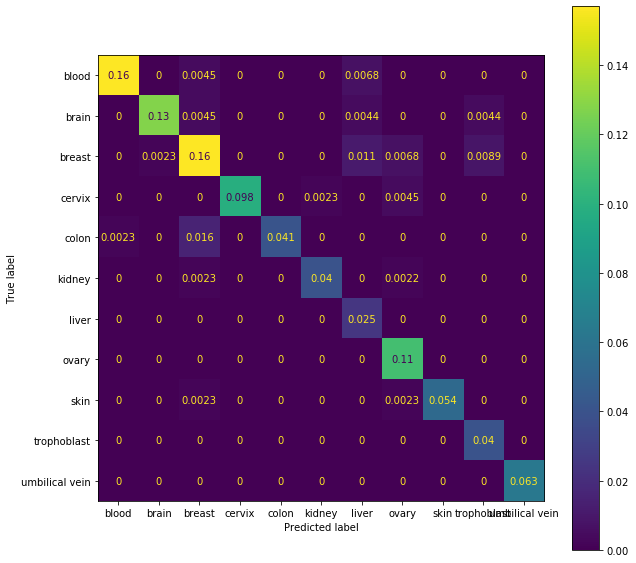

In [17]:
skf = StratifiedKFold(10)
cms = []
count = 0
for train, test in skf.split(data, labels):
    #print(f"TRAIN:\n{labels.iloc[train].value_counts()}\n")
    #print(f"TEST:\n{labels.iloc[test].value_counts()}\n")
    
    
    X_train = data.iloc[train,:]
    Y_train = labels.iloc[train]
    X_test = data.iloc[test,:]
    Y_test = labels.iloc[test]
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred, labels = clf.classes_)
    cms.append(cm)
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf2.classes_)
    #fig, ax = plt.subplots(figsize=(10,10))
    #disp.plot(ax = ax)

    count += 1

disp = ConfusionMatrixDisplay(confusion_matrix=sum(cms) / count,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax = ax)


In [135]:
for x in labels.unique():
    print(f"{x}: {(data[labels == x].sum() != 0).sum()}")

liver: 11040
blood: 9877
brain: 9794
skin: 4880
breast: 10593
umbilical vein: 4764
colon: 10095
trophoblast: 1355
ovary: 7499
kidney: 7218
cervix: 8550
